# 🤖 AI, CA3, Machine Learning 📚  

* **Name** : [Kasra] 🖊  
* **Last Name** : [Kashani] 📝  
* **SID** : [810101490] 🆔

## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import xgboost as xg
import matplotlib.pyplot as plt
import random
from itertools import combinations
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn import tree
from scipy.stats import randint

## 🧹 Data Preprocessing  
Implement all your preprocessing in this section, following the guidelines provided in the project documentation 📄.  

### 📥 Load Dataset  
In this subsection, you should load the dataset as a pandas dataframe 🐼.

In [3]:
# Load and read dataset from csv file as a dataframe
df = pd.read_csv("hotels_in_europe.csv")

display(df)

,name,location,price,rating,quality,review,bed,size,distance_from_center,room_type,nights,adults,free_cancellation
0,WIT Hotel,"9th arr., Paris","IRR 7,951,542",7.1,Good,"3,300 reviews",1 double bed,20m²,1.9,Suite,1 night,1 adult,NaN
1,UCPA SPORT STATION HOSTEL PARIS,"19th arr., Paris","IRR 1,397,677",8.0,Very good,"5,921 reviews",1 single bed,NaN,4.6,Single Bed in 6-Bed Dormitory Room,1 night,1 adult,NaN
2,Timhotel Montmartre,"18th arr., Paris","IRR 7,569,083",8.3,Very good,"2,532 reviews",1 single bed,NaN,3.4,Comfort Single Room,1 night,1 adult,NaN
3,Hôtel Galileo Champs Elysées,"8th arr., Paris","IRR 6,447,737",8.6,Fabulous,"1,457 reviews",1 large double bed,NaN,4.2,Classic Room,1 night,1 adult,NaN
4,Hôtel Le Daum,"12th arr., Paris","IRR 7,913,496",8.3,Very good,"1,273 reviews",1 double bed,NaN,4.1,Comfort Double Room,1 night,1 adult,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7317,Eurostars Berlin,"Mitte, Berlin","IRR 31,998,398",8.0,Very good,"5,933 reviews",Beds: 1 double or 2 singles,NaN,0.9,Superior Double Room,4 nights,2 adults,NaN
7318,Hotel Domicil Berlin by Golden Tulip,"Charlottenburg-Wilmersdorf, Berlin","IRR 14,817,781",7.7,Good,"1,546 reviews",2 single beds,NaN,4.9,Standard Twin Room,4 nights,2 adults,NaN
7319,"Crowne Plaza Berlin City Centre Ku'damm, an IH...","Charlottenburg, Berlin","IRR 30,236,284",8.3,Very good,"5,813 reviews",Multiple bed types,NaN,2.8,Standard Room,4 nights,2 adults,NaN
7320,Leonardo Hotel Berlin KU'DAMM,"Charlottenburg-Wilmersdorf, Berlin","IRR 19,503,404",8.0,Very good,"8,631 reviews",Beds: 1 double or 2 singles,NaN,3.9,Comfort Double Room,4 nights,2 adults,Free cancellation


In [4]:
df.info()

# We find that there are some NaN values in "rating", "quality", "review", "bed", "size" and "free_cancellation" columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7322 non-null   object 
 1   location              7322 non-null   object 
 2   price                 7322 non-null   object 
 3   rating                7129 non-null   float64
 4   quality               7169 non-null   object 
 5   review                7169 non-null   object 
 6   bed                   7299 non-null   object 
 7   size                  2454 non-null   object 
 8   distance_from_center  7322 non-null   float64
 9   room_type             7322 non-null   object 
 10  nights                7322 non-null   object 
 11  adults                7322 non-null   object 
 12  free_cancellation     583 non-null    object 
dtypes: float64(2), object(11)
memory usage: 743.8+ KB


In [5]:
df.describe()

# Some information about fully numeric columns that are "rating" and "distance_from_center"

,rating,distance_from_center
count,7129.000000,7322.000000
mean,7.742783,24.699399
std,1.128965,82.440210
min,1.000000,0.500000
25%,7.300000,2.200000
50%,8.000000,3.700000
75%,8.400000,5.800000
max,10.000000,500.000000


### 🧩 Manipulate Columns 🔢  
In this subsection, you should extract numerical values from columns and also convert categorical data to numerical values,as described in the project documentation 📄.

In [6]:
# Extract numerical values from "price" column
def numerical_price(item):
    price = item.replace("IRR", '').replace(',', '').strip()
    return int(price)

df["price"] = df["price"].apply(numerical_price)

display(df["price"])

0        7951542
1        1397677
2        7569083
3        6447737
4        7913496
          ...   
7317    31998398
7318    14817781
7319    30236284
7320    19503404
7321    25871045
Name: price, Length: 7322, dtype: int64

In [7]:
# Extract numerical values from "review" column
def numerical_review(item):
    if(pd.notna(item)):
        review = item.replace("reviews", '').replace("external", '').replace("review", '').replace(',', '').strip()
        return int(review)
    return item

df["review"] = df["review"].apply(numerical_review)

display(df["review"])

0        3300.0
1        5921.0
2        2532.0
3        1457.0
4        1273.0
         ...   
7317     5933.0
7318     1546.0
7319     5813.0
7320     8631.0
7321    12360.0
Name: review, Length: 7322, dtype: float64

In [8]:
# Extract numerical values from "bed" column 
def numerical_bed(item):
    if(pd.notna(item)):
        for char in item:
            if(char.isnumeric()):
                return int(char)
        return 3 # If it doesnt contain any specific number of beds, we set it to 3 beds by default
    return item

df["bed"] = df["bed"].apply(numerical_bed)

display(df["bed"])

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
7317    1.0
7318    2.0
7319    3.0
7320    1.0
7321    1.0
Name: bed, Length: 7322, dtype: float64

In [9]:
# Extract numerical values from "size" column
def numerical_size(item):
    if(pd.notna(item)):
        size = item[:-2].strip()
        return int(size)
    return item

df["size"] = df["size"].apply(numerical_size)

display(df["size"])

0       20.0
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
7317     NaN
7318     NaN
7319     NaN
7320     NaN
7321     NaN
Name: size, Length: 7322, dtype: float64

In [10]:
# Extract numerical values from "nights" column
def numerical_nights(item):
    nights = item.replace("nights", '').replace("night", '').strip()
    return int(nights)

df["nights"] = df["nights"].apply(numerical_nights)

display(df["nights"])

0       1
1       1
2       1
3       1
4       1
       ..
7317    4
7318    4
7319    4
7320    4
7321    4
Name: nights, Length: 7322, dtype: int64

In [11]:
# Extract numerical values from "adults" column
def numerical_adults(item):
    adults = item.replace("adults", '').replace("adult", '').strip()
    return int(adults)

df["adults"] = df["adults"].apply(numerical_adults)

display(df["adults"])

0       1
1       1
2       1
3       1
4       1
       ..
7317    2
7318    2
7319    2
7320    2
7321    2
Name: adults, Length: 7322, dtype: int64

In [12]:
# If there is Free cancellation in "free_cancellation" column, we set it to 1
def numerical_free_cancellation(item):
    if(pd.notna(item)):
        return 1
    return item

df["free_cancellation"] = df["free_cancellation"].apply(numerical_free_cancellation)

display(df["free_cancellation"])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7317    NaN
7318    NaN
7319    NaN
7320    1.0
7321    1.0
Name: free_cancellation, Length: 7322, dtype: float64

In [13]:
# Delete "name" column, because they do not have any information
df = df.drop("name", axis=1)

# Delete "quality" column, because we already have "rating" column that is a better feature
df = df.drop("quality", axis=1)

# Delete "size" column, because they have many NaN values and they cannot give any information
df = df.drop("size", axis=1)

# Delete "room_type" column, because they have many unique values and they are not convertable to numbers
df = df.drop("room_type", axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7322 non-null   object 
 1   price                 7322 non-null   int64  
 2   rating                7129 non-null   float64
 3   review                7169 non-null   float64
 4   bed                   7299 non-null   float64
 5   distance_from_center  7322 non-null   float64
 6   nights                7322 non-null   int64  
 7   adults                7322 non-null   int64  
 8   free_cancellation     583 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 515.0+ KB


### 🛠 Handling Missing Values 💡
In this subsection, you are supposed to handle null and missing values, following regular techinuques, used in this context

In [14]:
# Convert NaN values in "rating" column to its median domain which is 5.0
df.loc[df["rating"].isna(), "rating"] = 5.0

In [15]:
# Convert NaN values in "review" column to "review"s mean
df.loc[df["review"].isna(), "review"] = df["review"].mean()

In [16]:
# Delete NaN values in "bed" column, because they are discrete and we cannot set this feature arbitrary
df = df[df["bed"].notna()]

In [17]:
# Convert NaN values in "free_cancellation" column to 0, as described in the project
df.loc[df["free_cancellation"].isna(), "free_cancellation"] = 0

In [18]:
df["review"] = df["review"].astype(int)
df["bed"] = df["bed"].astype(int)
df["free_cancellation"] = df["free_cancellation"].astype(int)

df.info()

# We do not have any NaN values in columns

<class 'pandas.core.frame.DataFrame'>
Index: 7299 entries, 0 to 7321
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7299 non-null   object 
 1   price                 7299 non-null   int64  
 2   rating                7299 non-null   float64
 3   review                7299 non-null   int64  
 4   bed                   7299 non-null   int64  
 5   distance_from_center  7299 non-null   float64
 6   nights                7299 non-null   int64  
 7   adults                7299 non-null   int64  
 8   free_cancellation     7299 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 570.2+ KB


### ➕ Additional Columns  
In this subsection, you should add some additional columns to the dataframe, according to the project documentation 📄.

In [19]:
# Split "location" column to separate "area" and "city" columns
location = df["location"].str.split(", ", expand=True)
df["area"] = location[0]
df["city"] = location[1]
df.loc[df["city"].isna(), "city"] = df["area"] # If city is NaN, we set it to its area
# Map a number to each area and city

df["area"] = df["area"].astype("category").cat.codes
df["city"] = df["city"].astype("category").cat.codes
df = df.drop("location", axis=1)

In [20]:
# Join "price" and "nights" column to "price_per_night" column that is price of the hotel for each night
price = df["price"]
nights = df["nights"]
df["price_per_night"] = price / nights
df = df.drop("price", axis=1)
df = df.drop("nights", axis=1)

In [21]:
display(df)

,rating,review,bed,distance_from_center,adults,free_cancellation,area,city,price_per_night
0,7.1,3300,1,1.9,1,0,19,3,7951542.00
1,8.0,5921,1,4.6,1,0,9,3,1397677.00
2,8.3,2532,1,3.4,1,0,8,3,7569083.00
3,8.6,1457,1,4.2,1,0,18,3,6447737.00
4,8.3,1273,1,4.1,1,0,2,3,7913496.00
...,...,...,...,...,...,...,...,...,...
7317,8.0,5933,1,0.9,2,0,49,0,7999599.50
7318,7.7,1546,2,4.9,2,0,30,0,3704445.25
7319,8.3,5813,3,2.8,2,0,29,0,7559071.00
7320,8.0,8631,1,3.9,2,1,30,0,4875851.00


### 🏷 Assigning Labels  
In this subsection, we want to assign labels to hotels 🏨, according to their price 💰.  
We have two labels:  
- **0** for hotels with a price less than a threshold 🟢.  
- **1** for those with higher prices 🔴.  

To determine the threshold, we use the median of prices 📊.  
In the first step, complete the following function. Then, you should use the `apply` method of pandas 🐼 to assign labels to each hotel.

In [22]:
def assign_label(x, column):
    if(x < df[column].median()):
        return 0 # Cheap label
    return 1 # Expensive labell
print(df["price_per_night"].median())
df["price_label"] = df["price_per_night"].apply(assign_label, column = "price_per_night")
df = df.drop("price_per_night", axis=1)

7900280.5


In [23]:
display(df)

,rating,review,bed,distance_from_center,adults,free_cancellation,area,city,price_label
0,7.1,3300,1,1.9,1,0,19,3,1
1,8.0,5921,1,4.6,1,0,9,3,0
2,8.3,2532,1,3.4,1,0,8,3,0
3,8.6,1457,1,4.2,1,0,18,3,0
4,8.3,1273,1,4.1,1,0,2,3,1
...,...,...,...,...,...,...,...,...,...
7317,8.0,5933,1,0.9,2,0,49,0,1
7318,7.7,1546,2,4.9,2,0,30,0,0
7319,8.3,5813,3,2.8,2,0,29,0,0
7320,8.0,8631,1,3.9,2,1,30,0,0


## 📊 Data Visualization  
Research and explore various data visualization techniques 🔍 to identify the best options for your project 🎯. Different approaches may be suitable for different aspects of your data 📈.

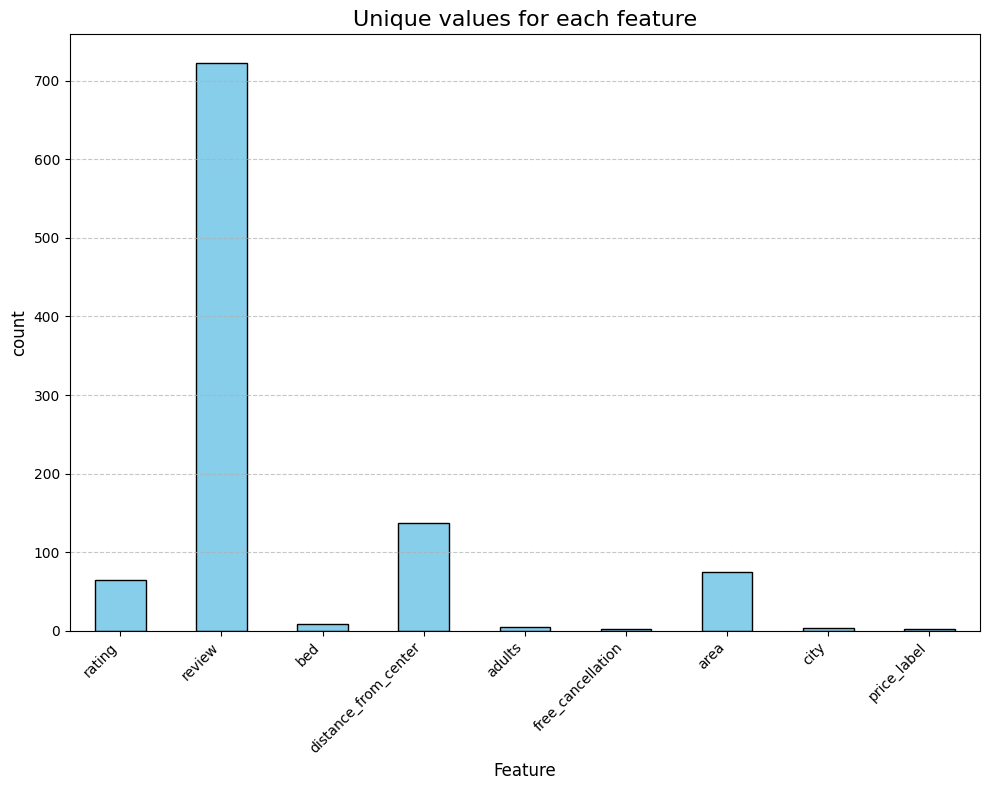

In [24]:
# Plot of unique values for each feature
unique_counts = df.nunique()
plt.figure(figsize=(10, 8))
unique_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Unique values for each feature", fontsize=16)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("count", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

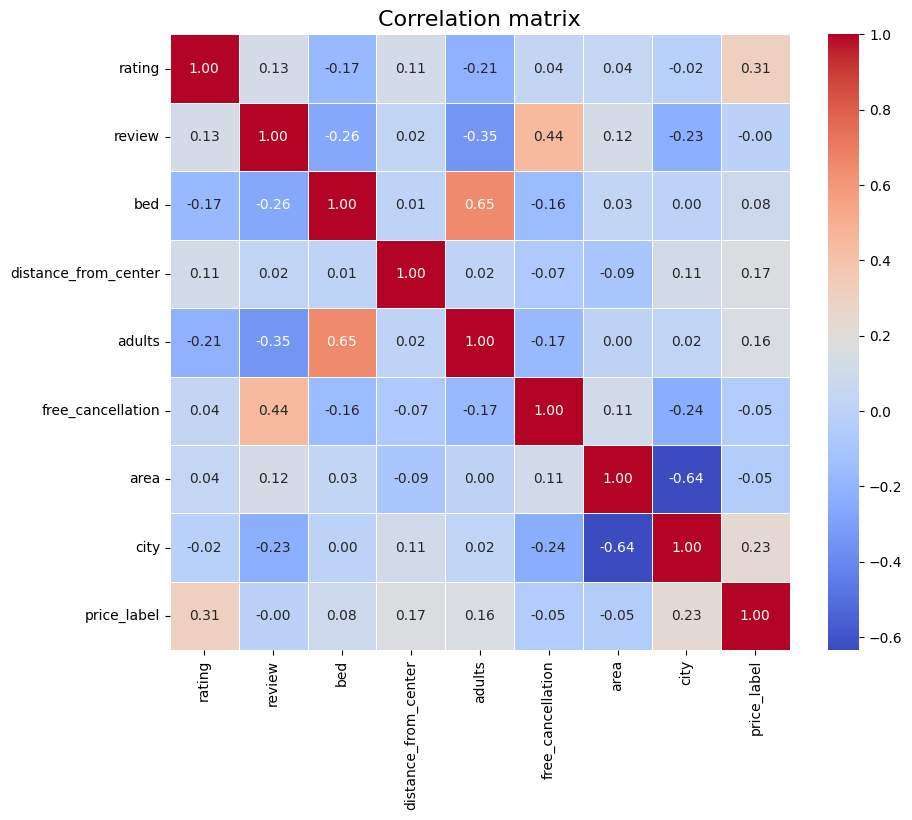

In [25]:
# Correlation matrix for all features
correlation_matrix = df .corr()
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix", fontsize=16)

plt.show()

# We find that rating feature is the most correlated feature to price_label

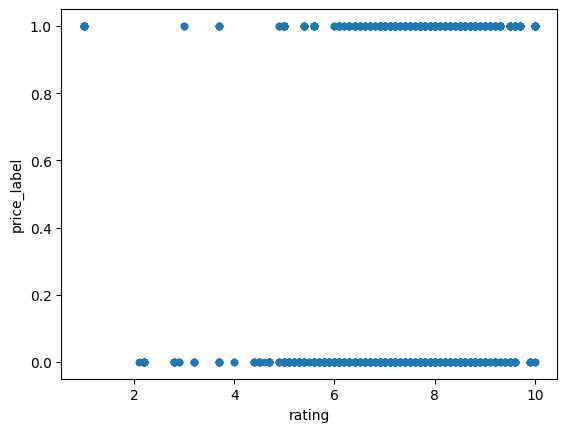

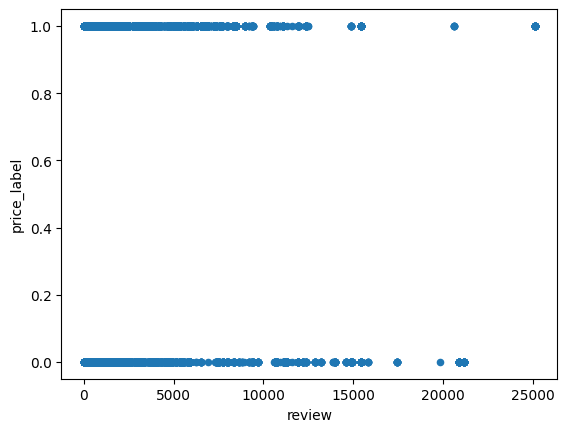

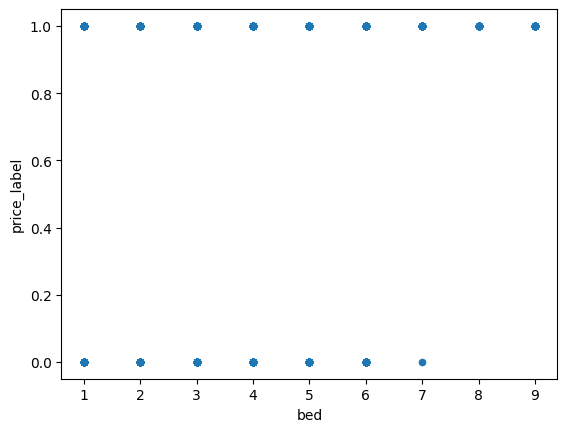

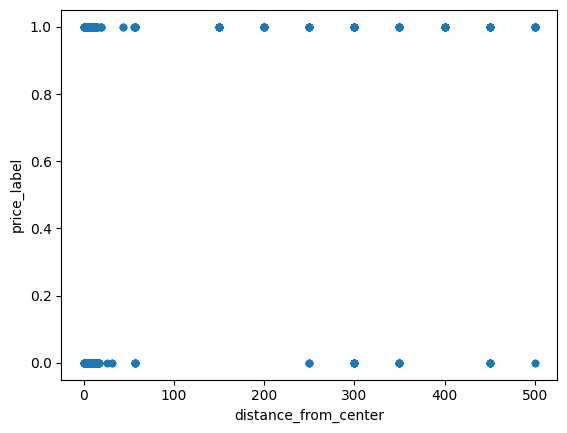

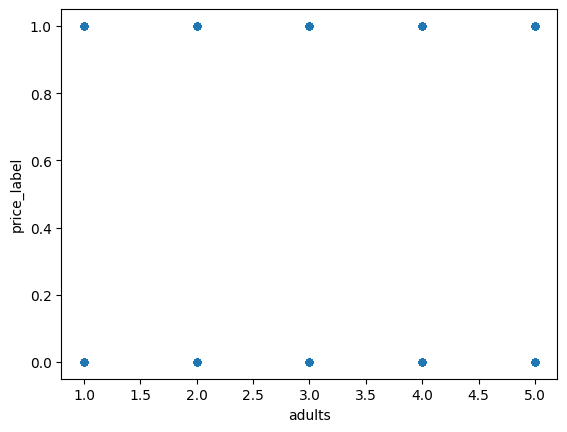

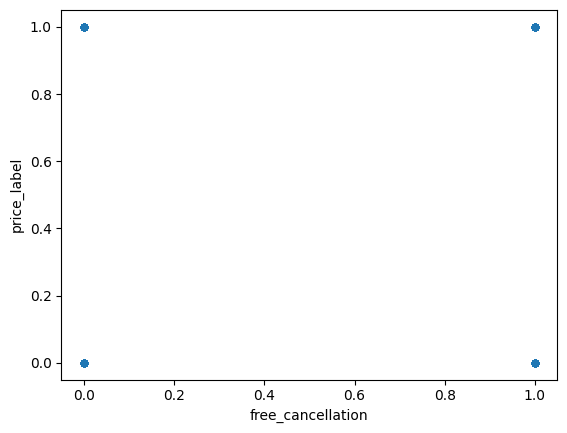

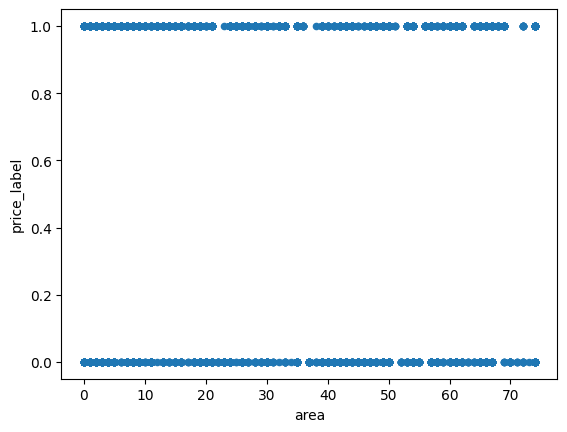

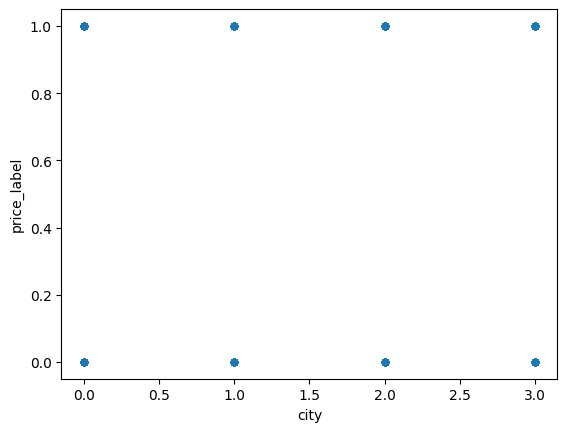

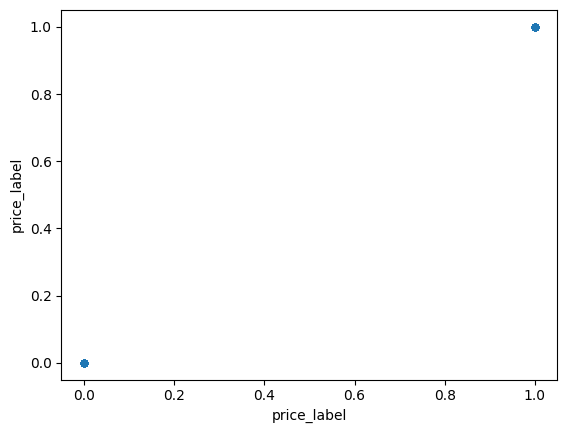

In [26]:
# Scatter plot for all features
for item in df:
    df.plot.scatter(x=item, y="price_label")

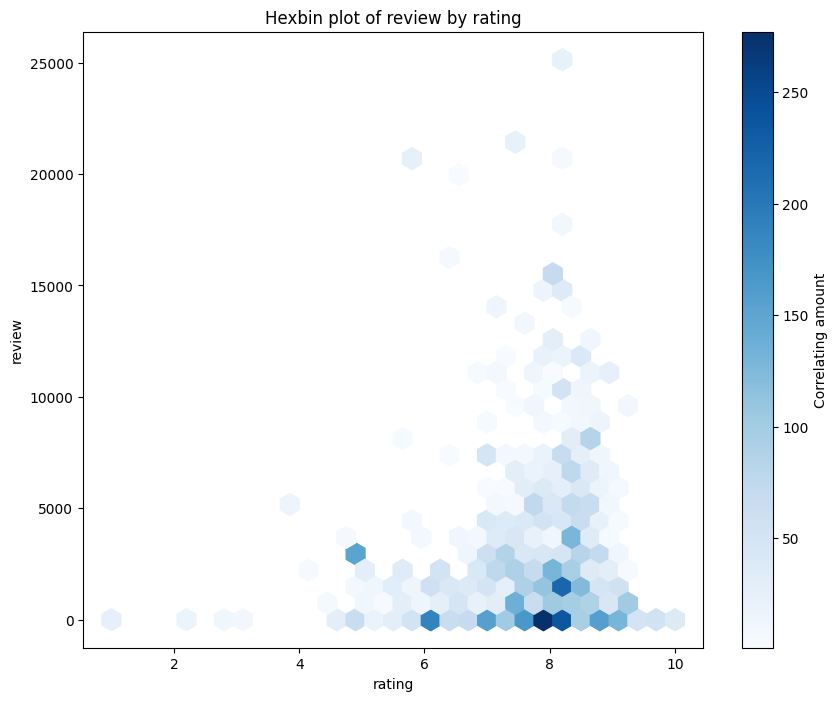

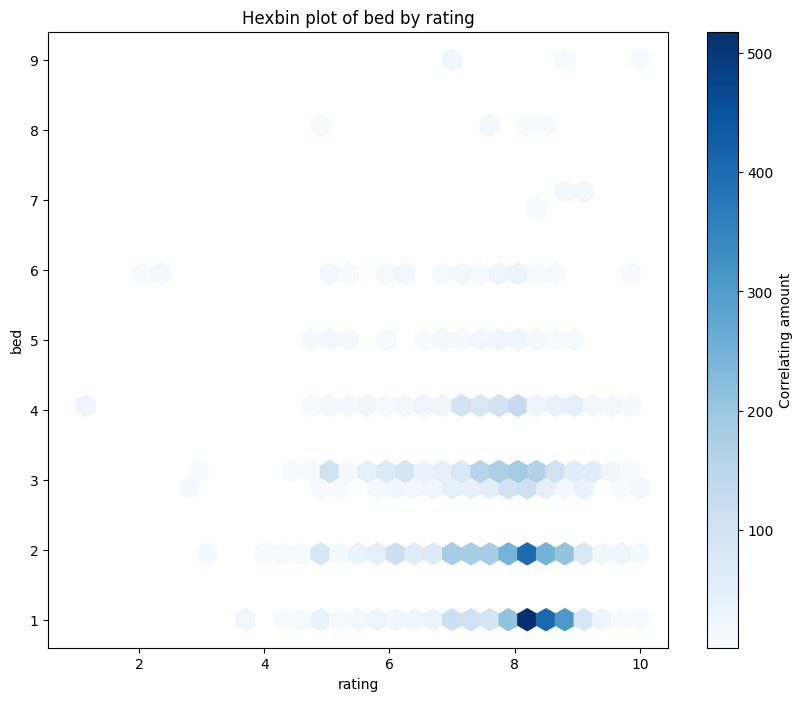

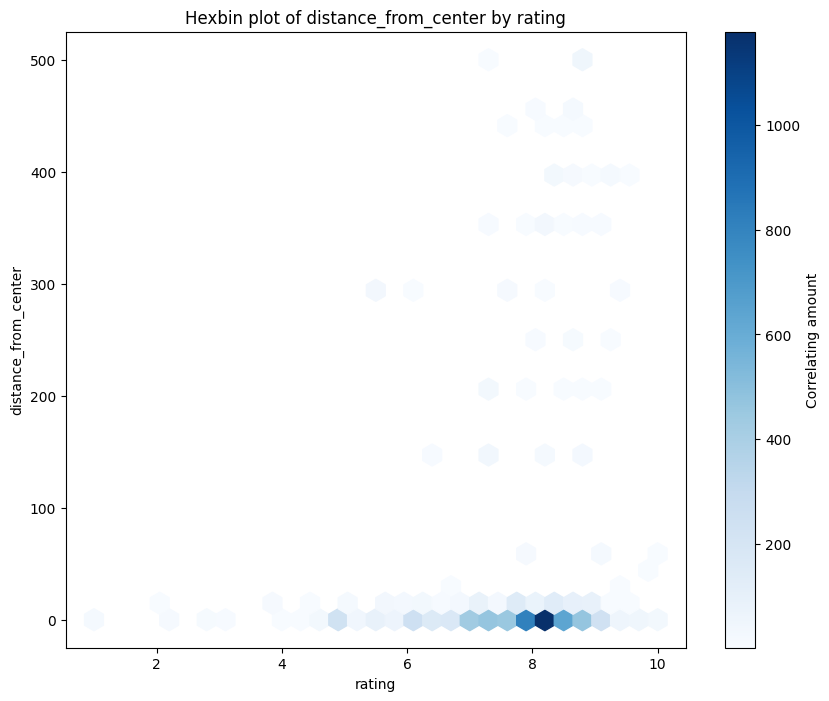

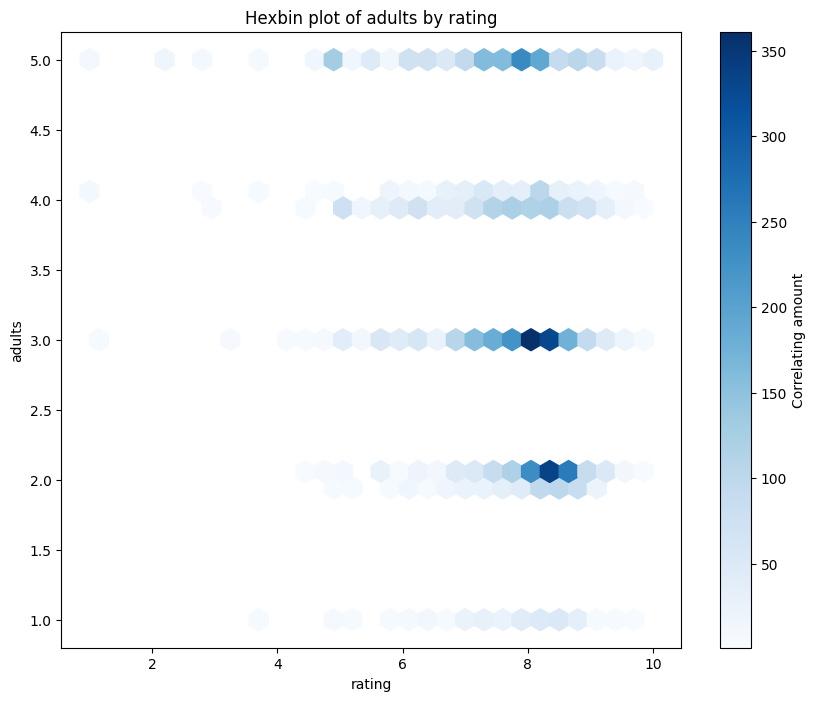

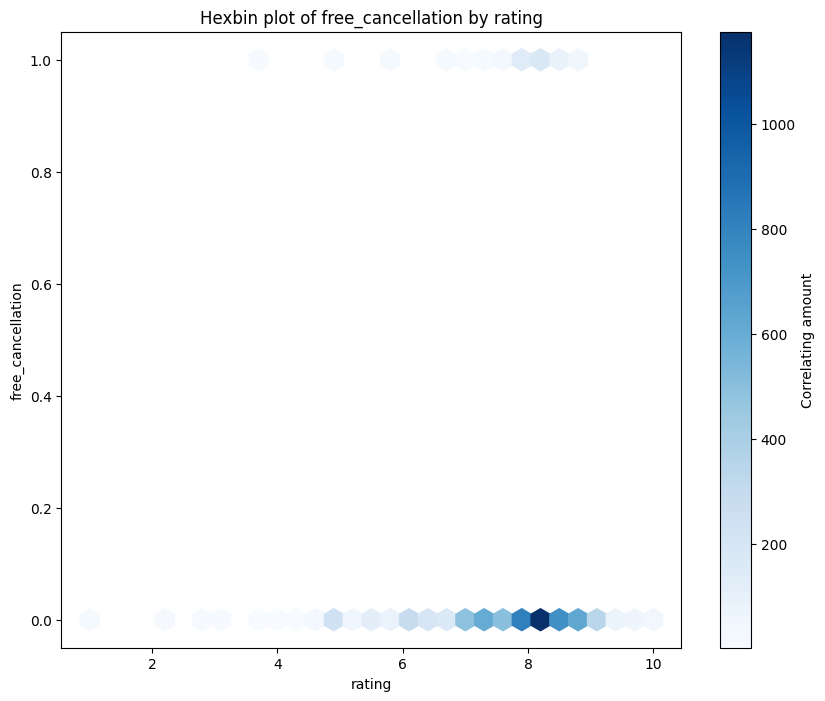

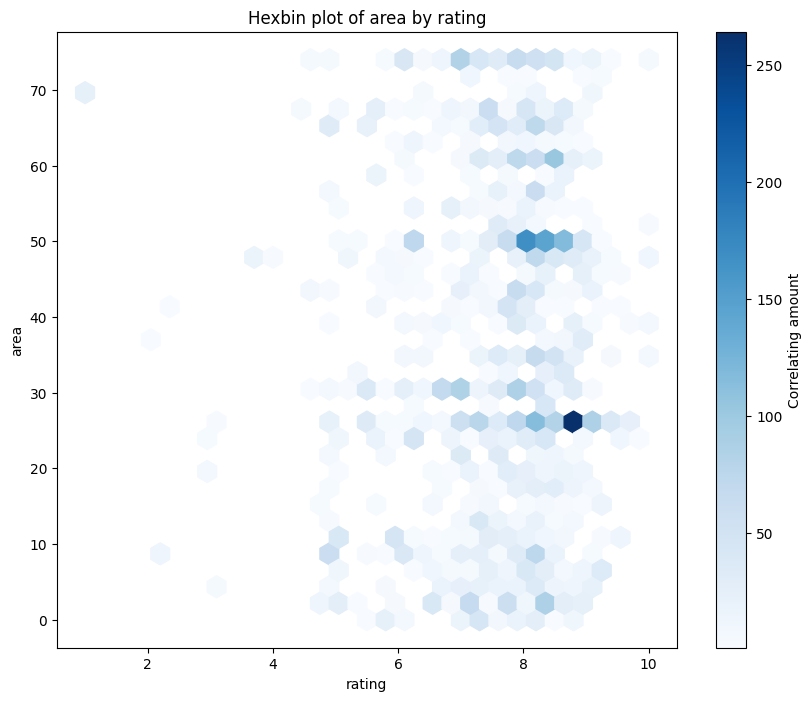

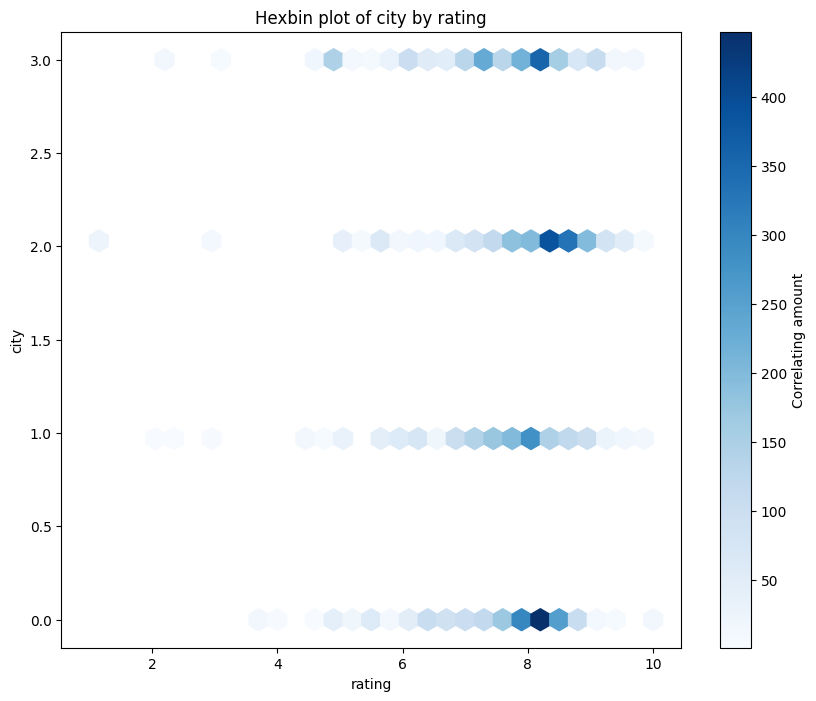

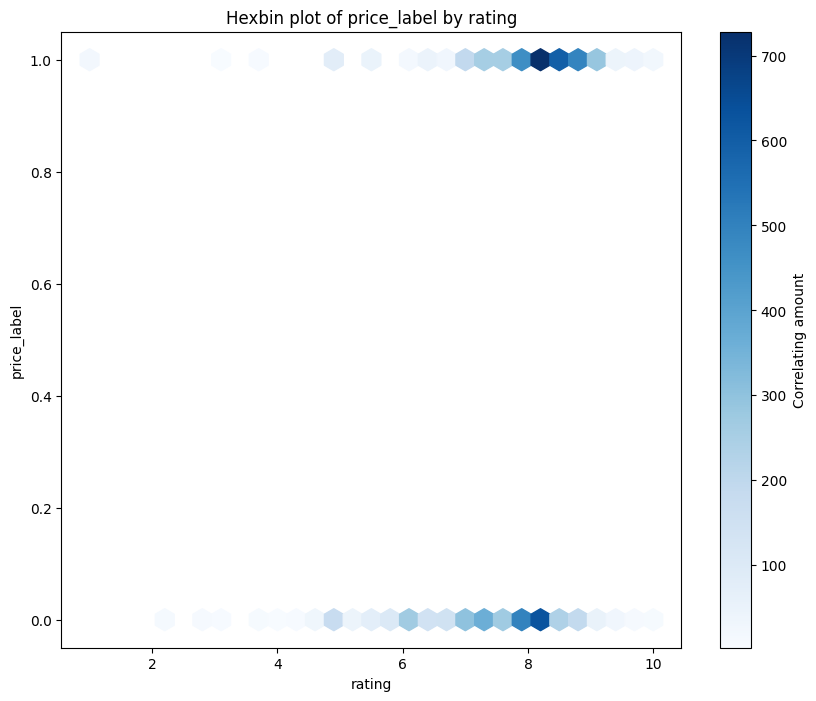

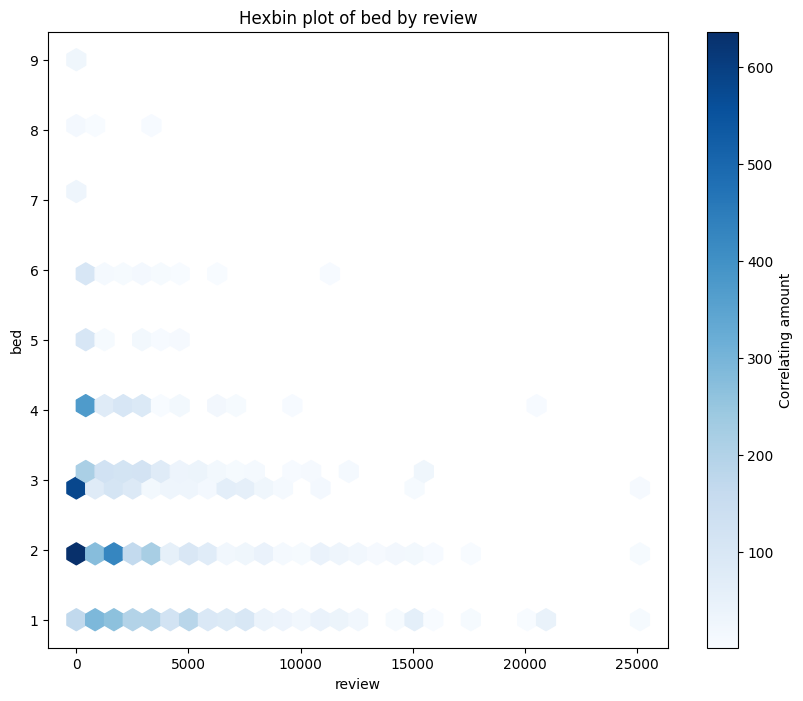

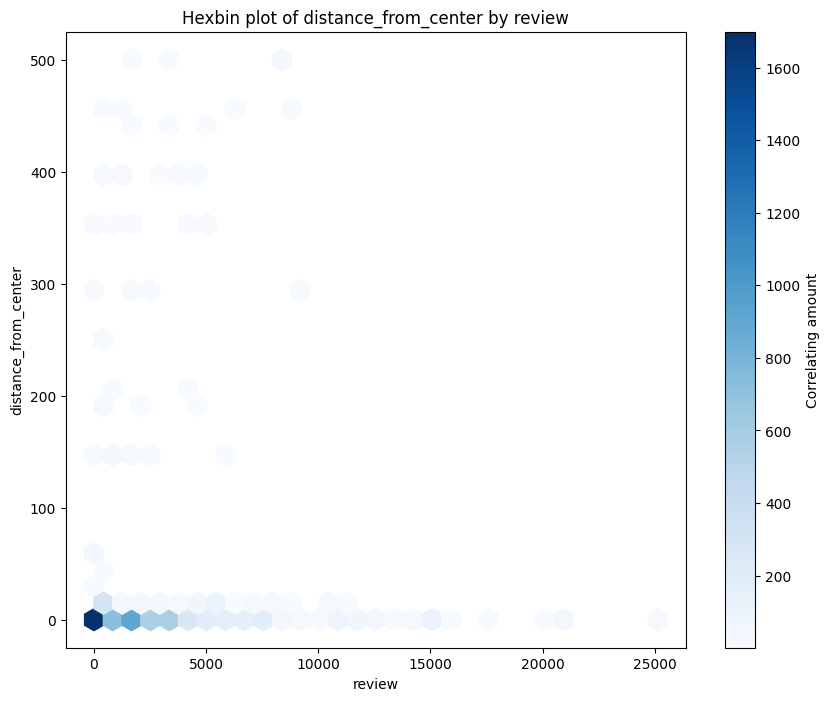

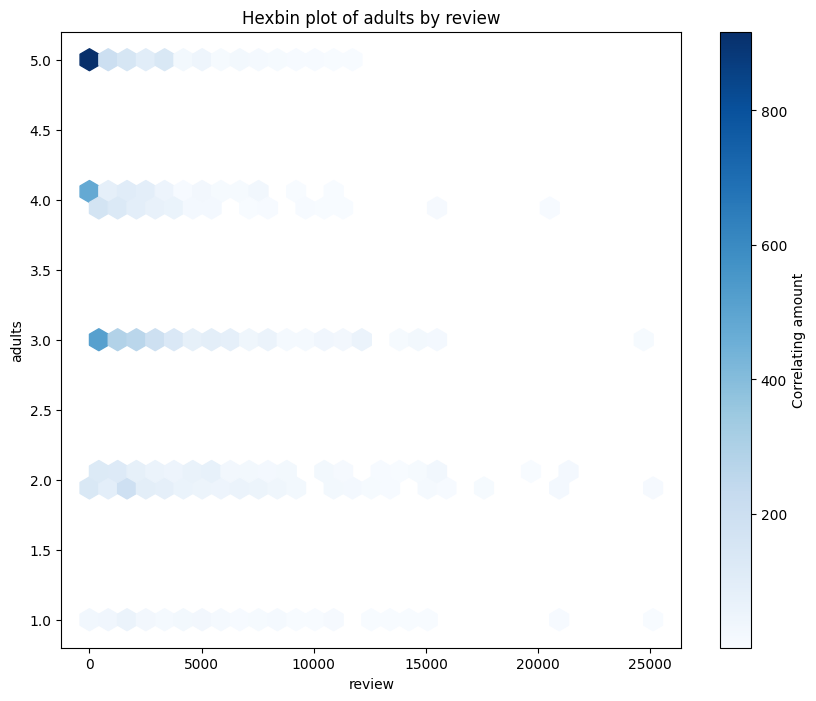

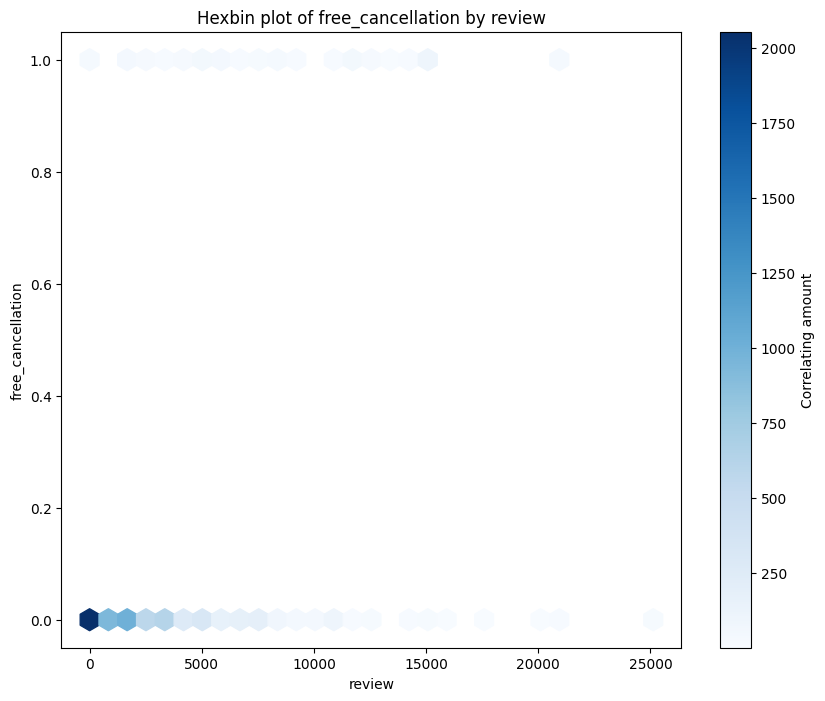

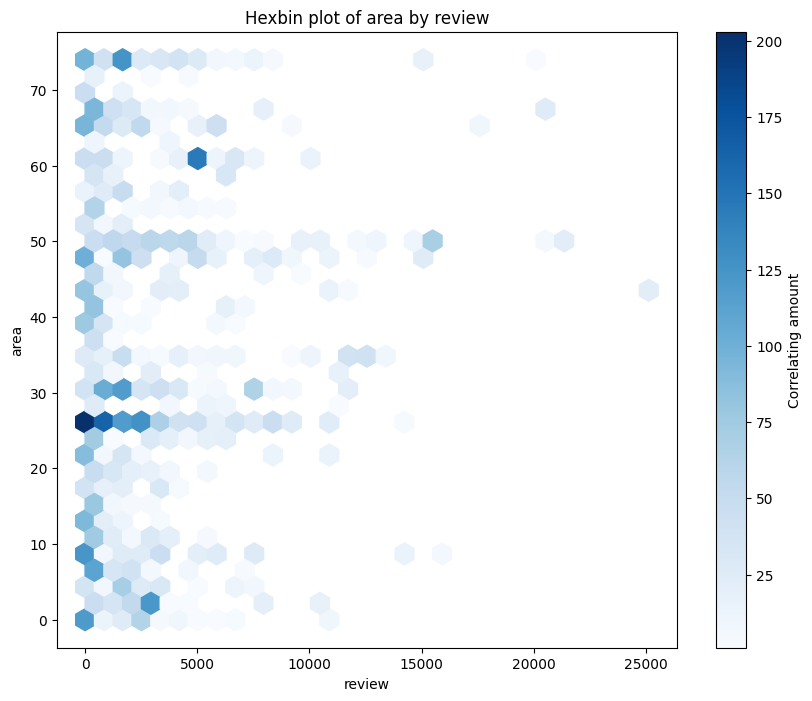

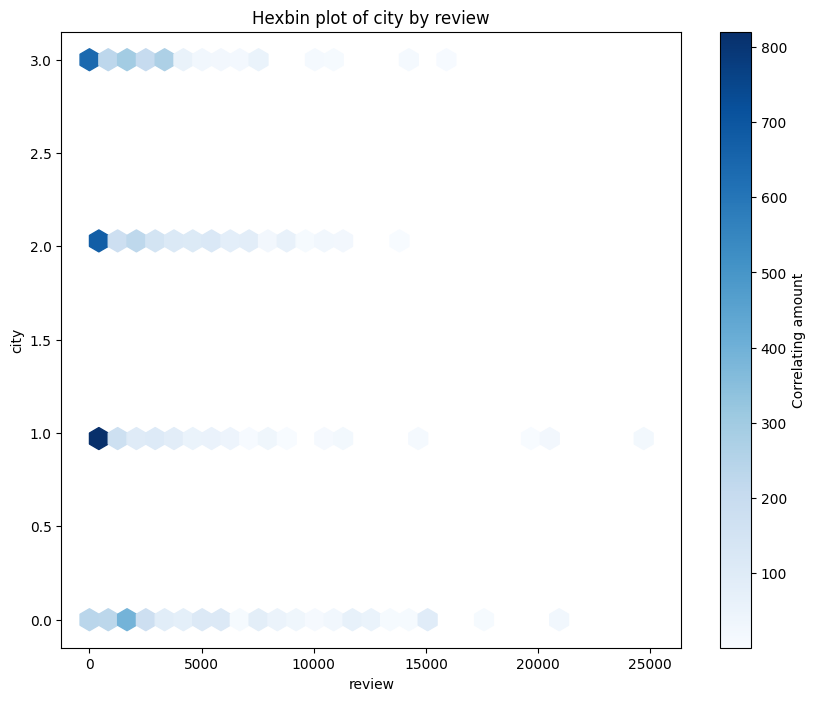

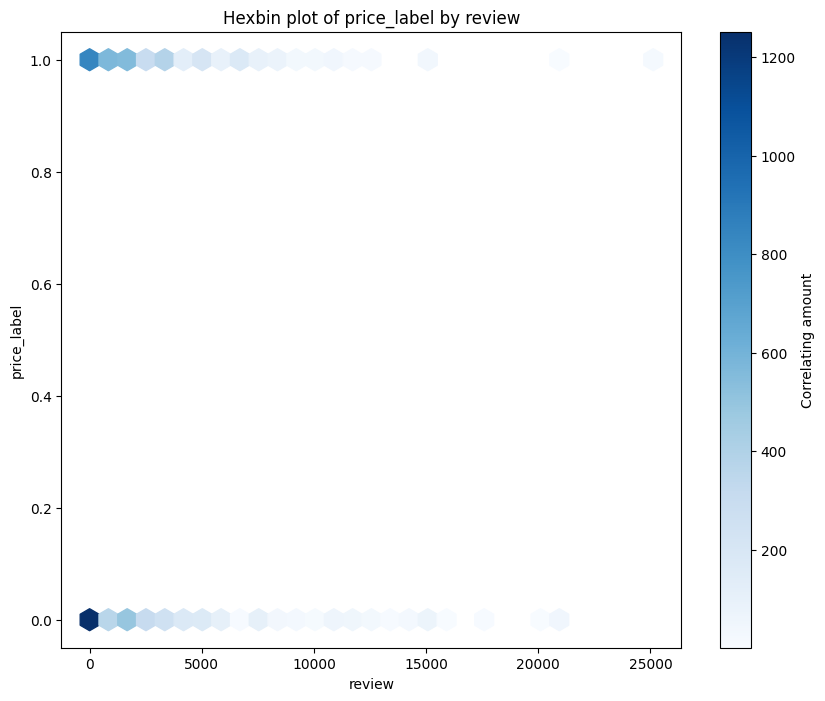

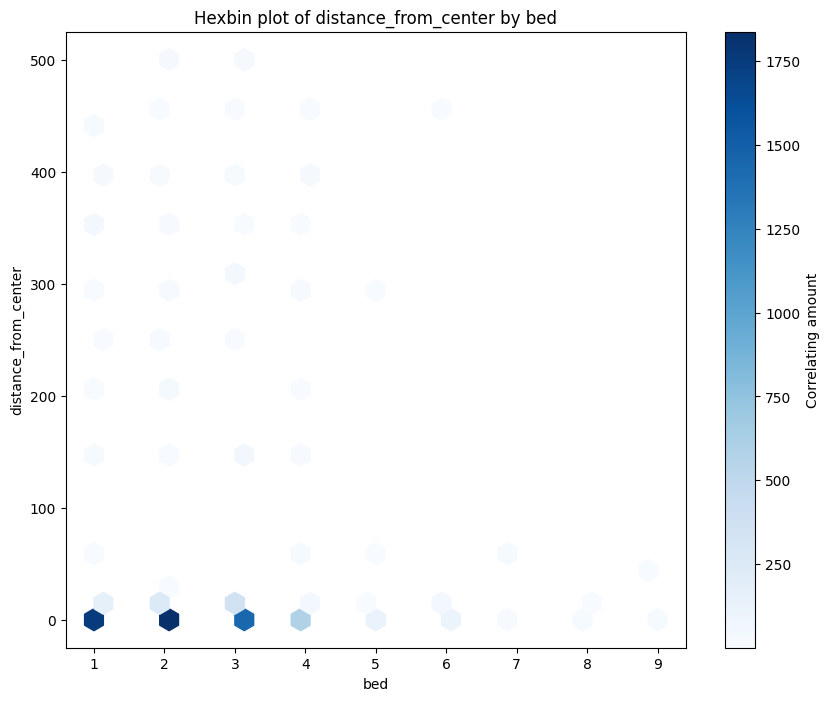

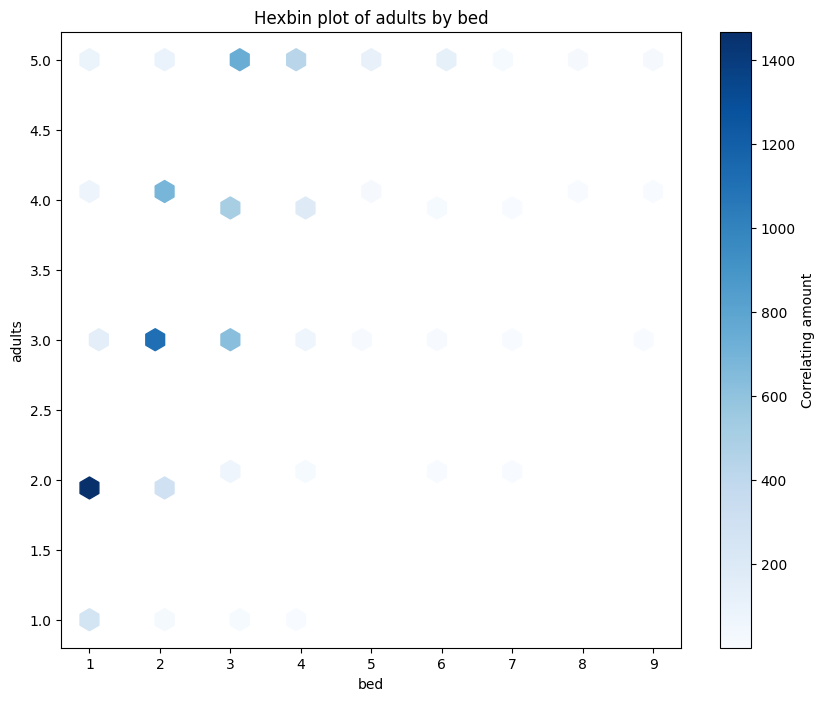

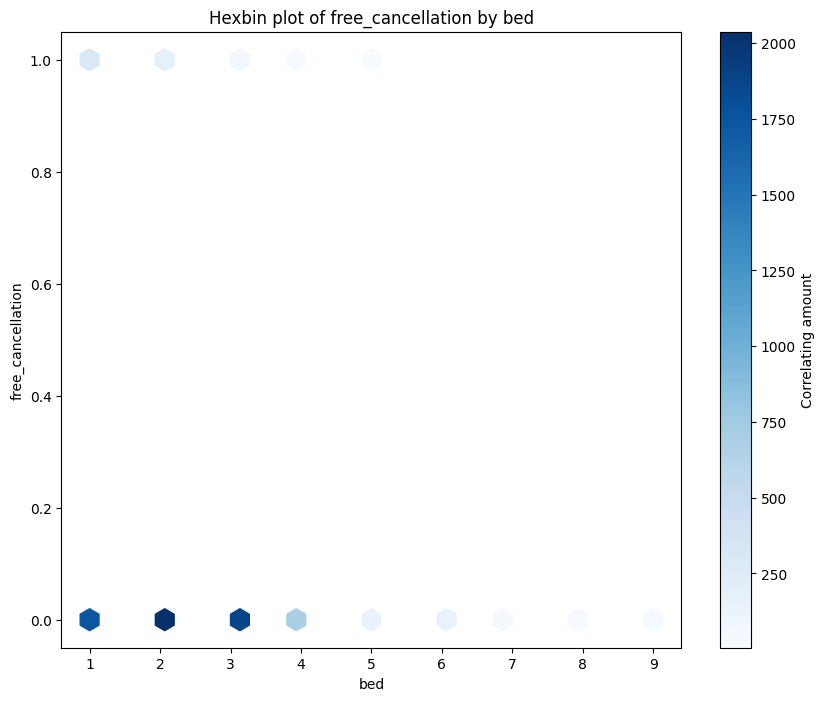

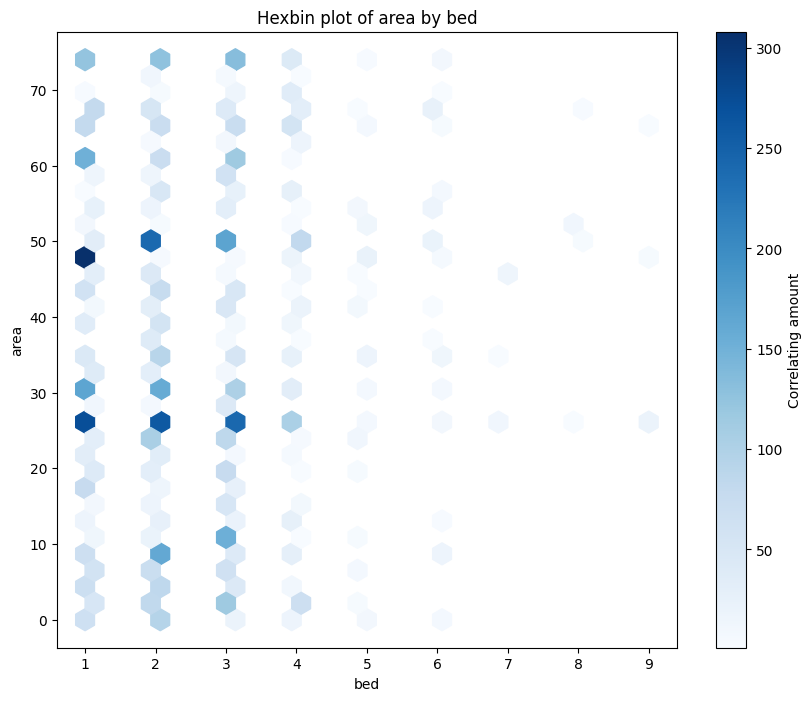

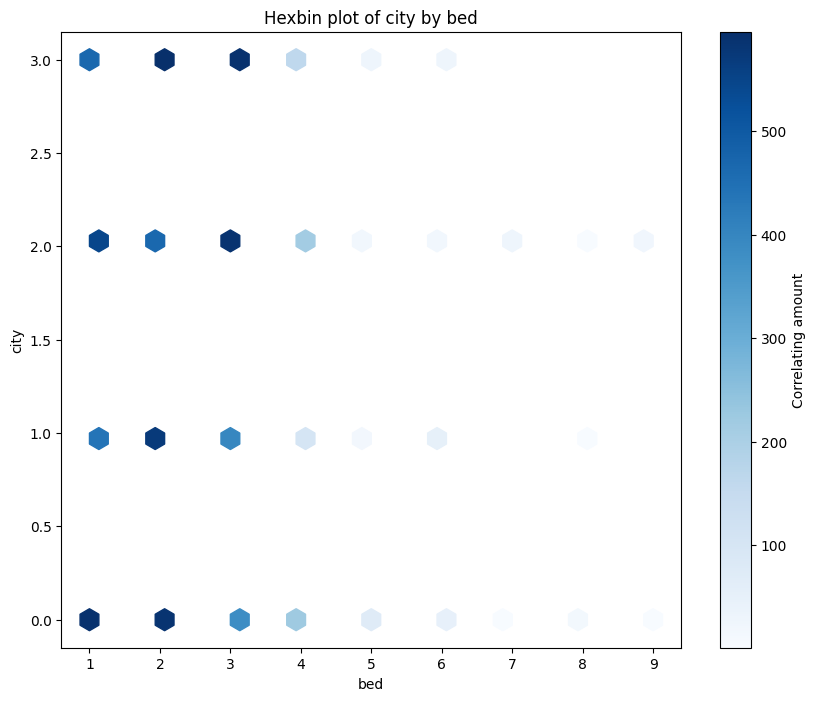

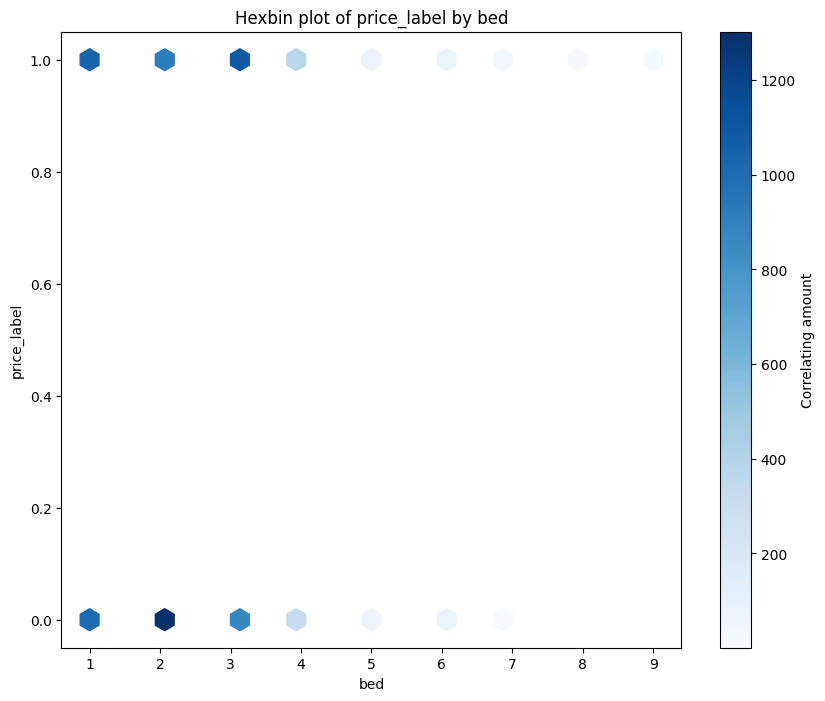

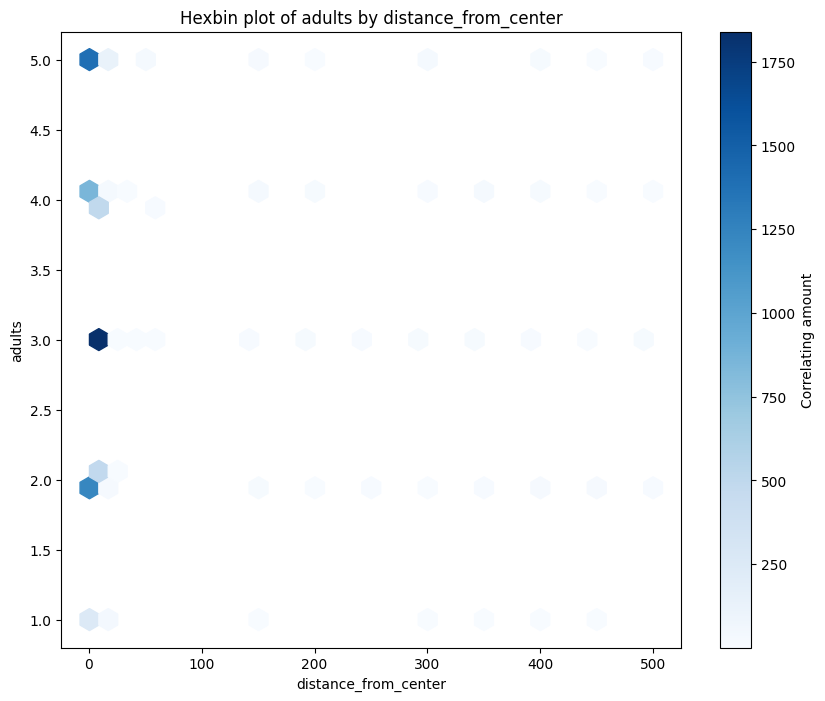

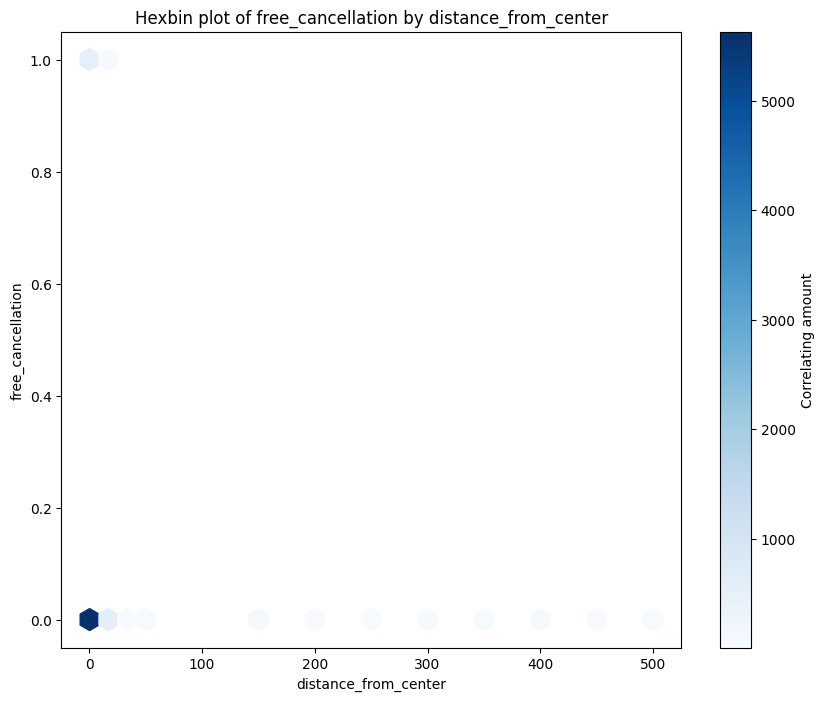

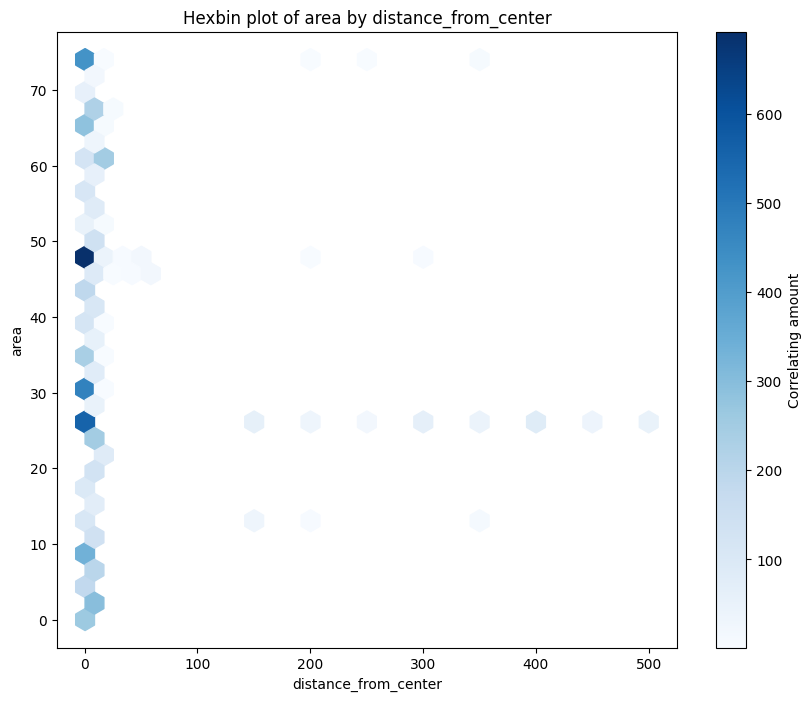

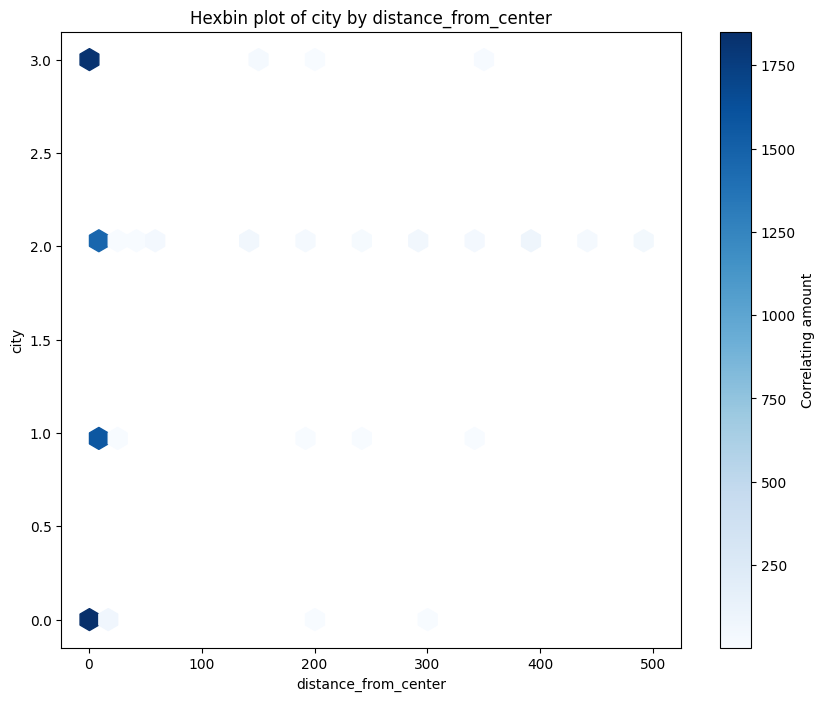

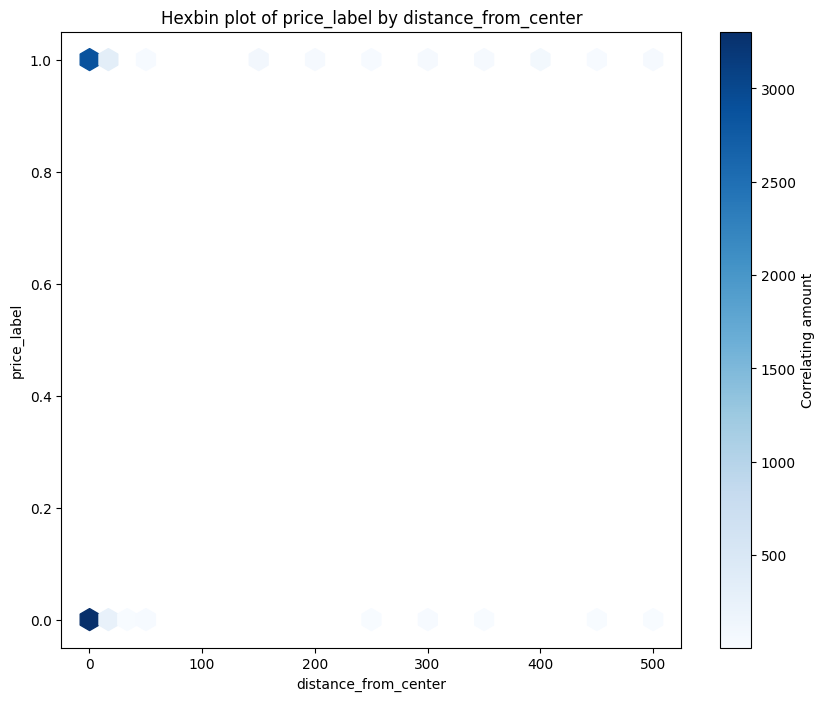

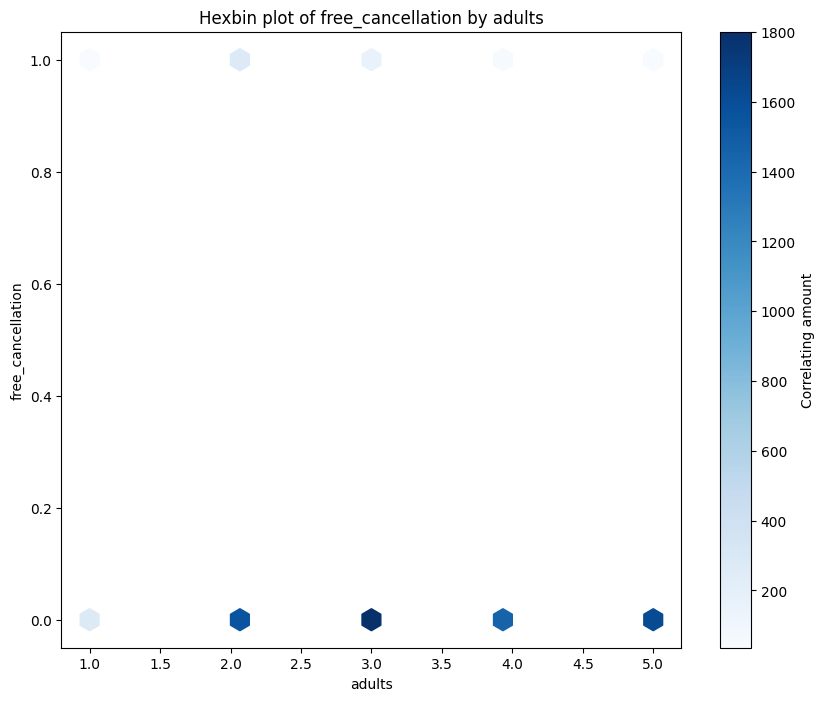

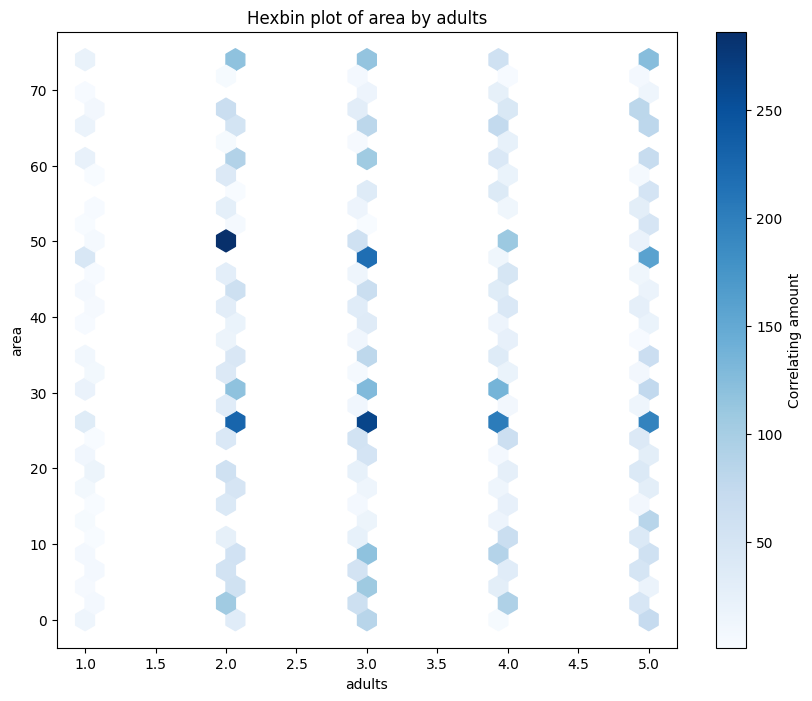

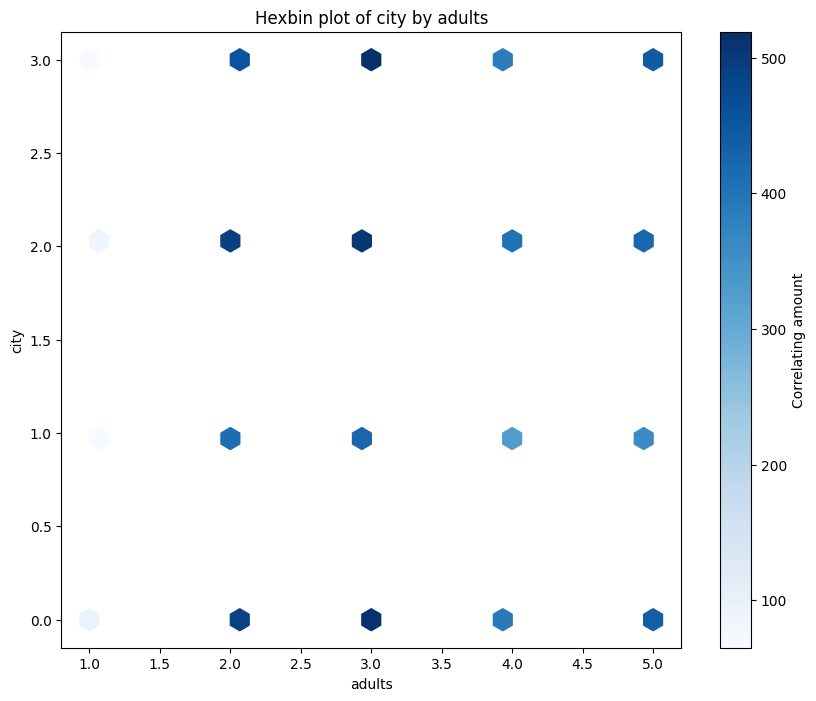

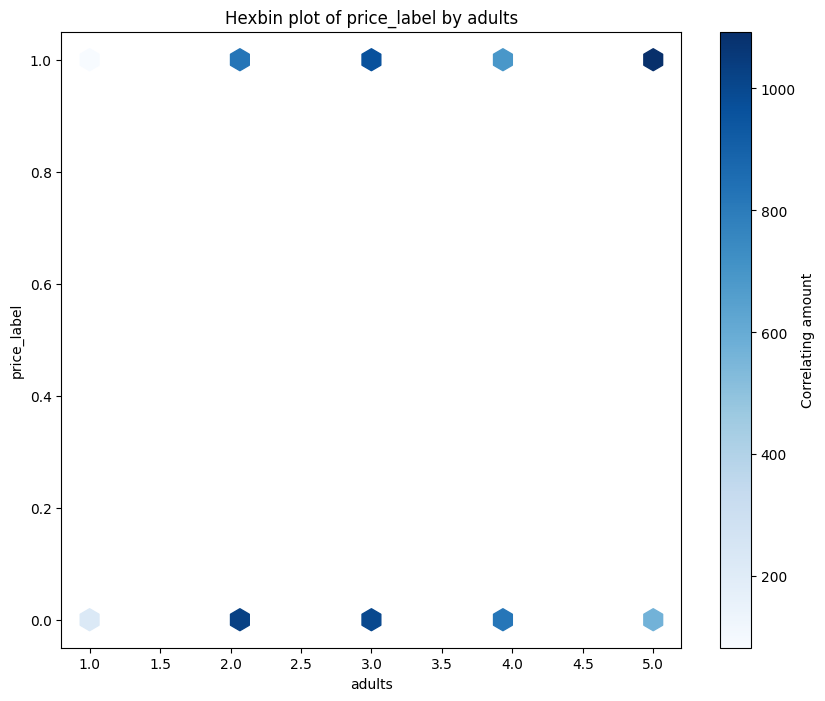

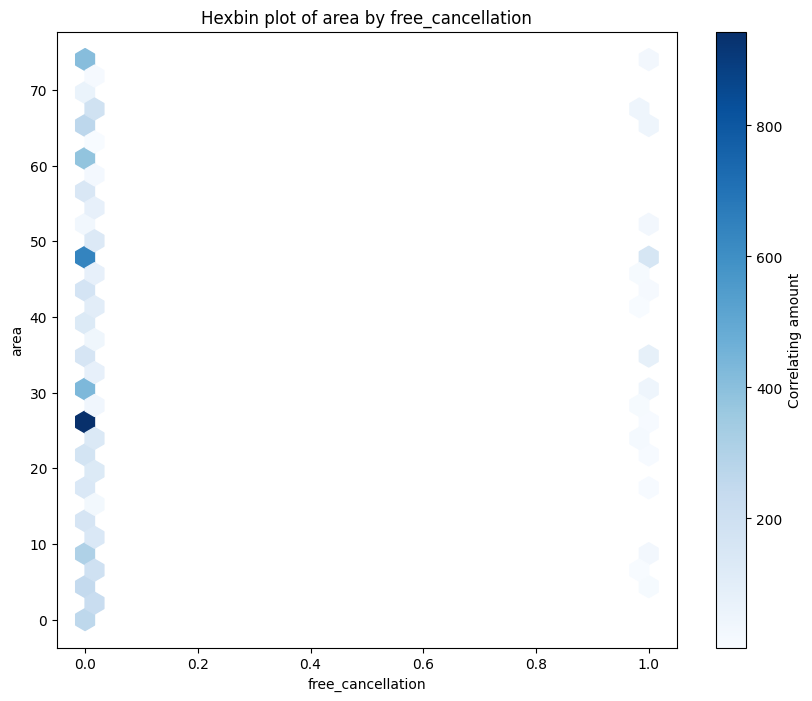

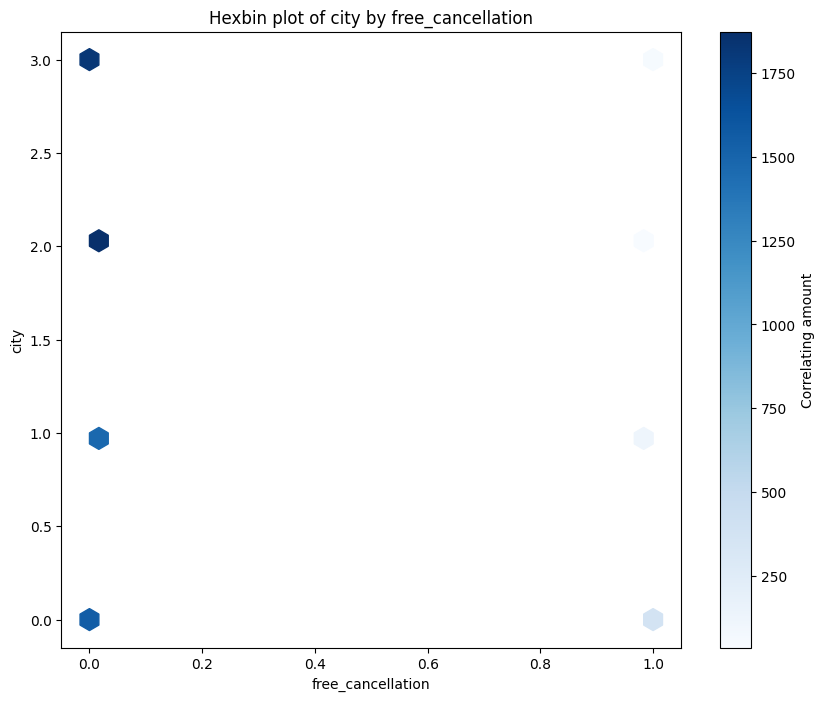

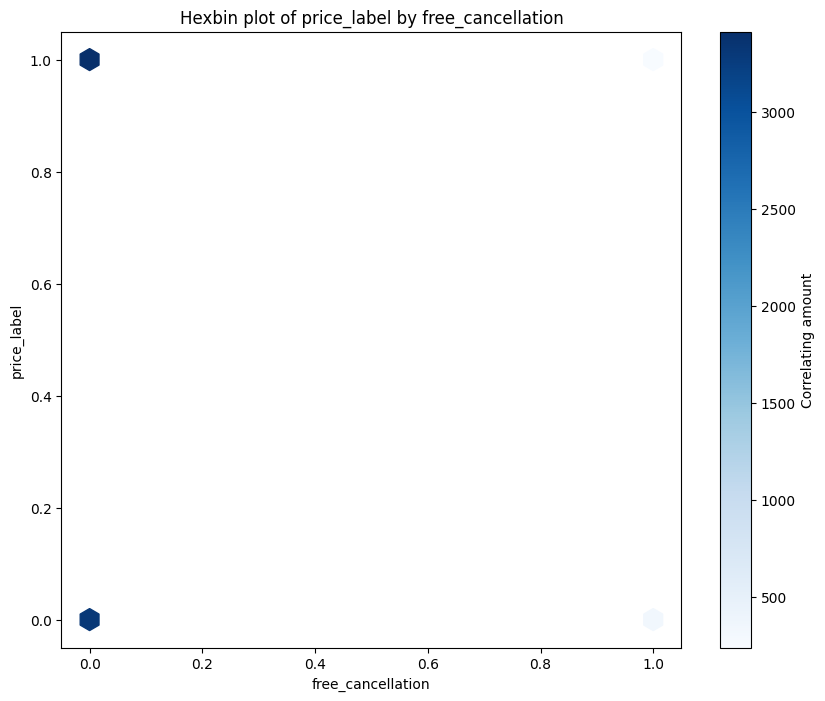

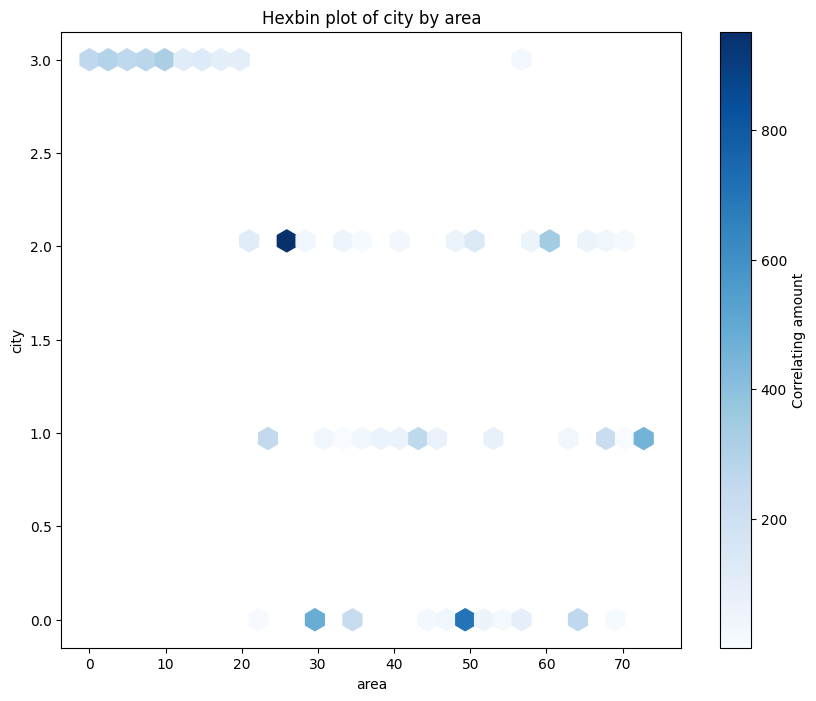

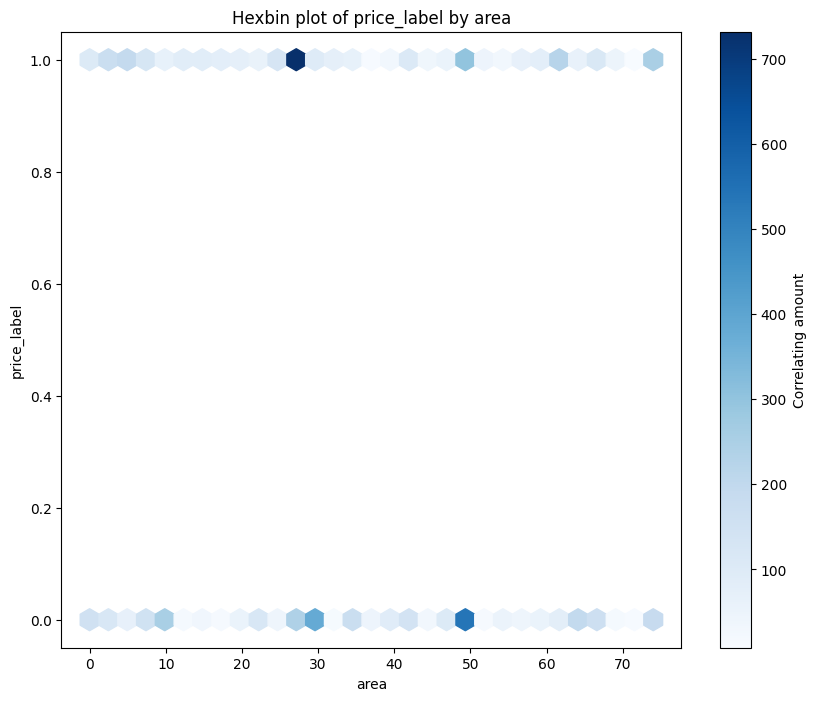

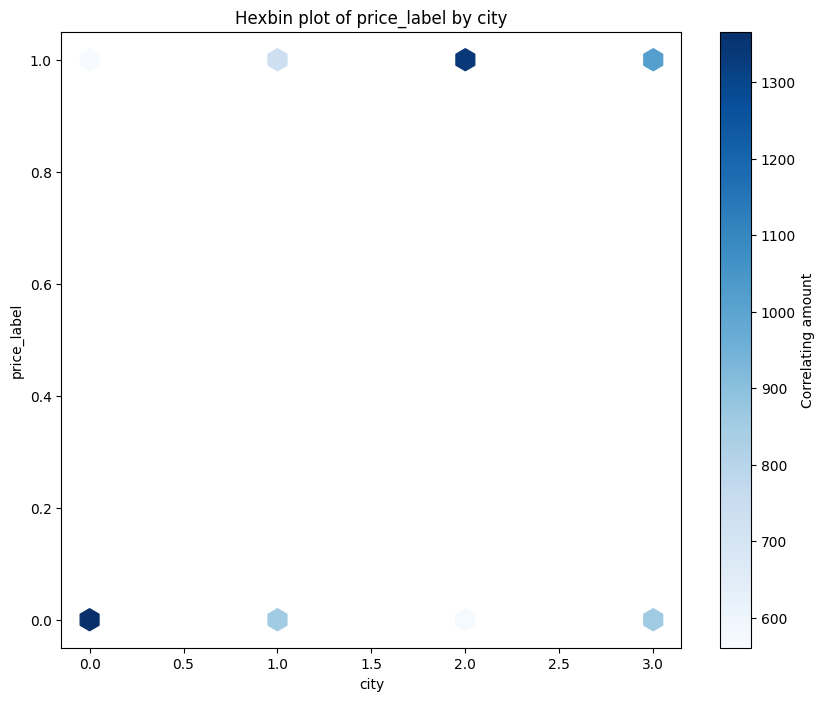

In [27]:
# Hexbin plot for all feature pairs
pairs = combinations(df, 2)
for x, y in pairs:
    plt.figure(figsize=(10, 8))
    plt.hexbin(df[x], df[y], gridsize=30, cmap="Blues", mincnt=1)
    plt.colorbar(label="Correlating amount")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"Hexbin plot of {y} by {x}")

    plt.show()

## 🏷 Classification  
In this section, we will go through the classification pipeline. We will deploy several machine learning models to classify hotels based on their price 💵. Finally, you will implement a boosting algorithm from scratch 🛠 and compare its performance with the library implementation 📚.

### 🔀 Train-Test Split  
You should divide the data into a training set and a test set. Use 20% of the data for testing and 80% for training 📊.

In [28]:
# We do not pass "price_label" column to train and test, because of preventing ftom overfitting
x_train, x_test, y_train, y_test = train_test_split(df.drop("price_label", axis=1), df["price_label"], test_size=0.2, random_state=42)

In [29]:
print(f"X train: {len(x_train)}")
print(f"X test: {len(y_test)}")
print(f"Y train: {len(y_train)}")
print(f"Y test: {len(y_test)}")

X train: 5839
X test: 1460
Y train: 5839
Y test: 1460


### 🌐 Normalization  
One of the most important steps in the classification pipeline is normalization. You will be asked about the importance of this step ⚙️.

In [30]:
# We use StandardScaler normalization instead of MinMax normalization, because our data does not contain many outlier and it is more accurate
standard_scaler = StandardScaler()
df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)

display(df)

,rating,review,bed,distance_from_center,adults,free_cancellation,area,city,price_label
0,-0.473419,0.064974,-1.072007,-0.274764,-1.93835,-0.294631,-0.757460,1.31026,0.999315
1,0.278009,0.733551,-1.072007,-0.241777,-1.93835,-0.294631,-1.215217,1.31026,-1.000685
2,0.528486,-0.130931,-1.072007,-0.256438,-1.93835,-0.294631,-1.260993,1.31026,-1.000685
3,0.778962,-0.405147,-1.072007,-0.246664,-1.93835,-0.294631,-0.803235,1.31026,-1.000685
4,0.528486,-0.452083,-1.072007,-0.247886,-1.93835,-0.294631,-1.535647,1.31026,0.999315
...,...,...,...,...,...,...,...,...,...
7294,0.278009,0.736612,-1.072007,-0.286981,-1.10420,-0.294631,0.615812,-1.32967,0.999315
7295,0.027533,-0.382445,-0.298445,-0.238112,-1.10420,-0.294631,-0.253927,-1.32967,-1.000685
7296,0.528486,0.706002,0.475117,-0.263768,-1.10420,-0.294631,-0.299703,-1.32967,-1.000685
7297,0.278009,1.424831,-1.072007,-0.250329,-1.10420,3.394072,-0.253927,-1.32967,-1.000685


### 🚀 Deploying Sklearn Models  
In this subsection, you should use built-in models from the sklearn library for the classification task. Don't forget to show the complete classification report, including the confusion matrix, precision, recall, F1-score, and accuracy 📊. You will be asked about these metrics 📈.

#### 📉 Gaussian Naive Bayes

In [31]:
naive = GaussianNB()

naive.fit(x_train, y_train) # Learn training data
y_pred = naive.predict(x_test) # Use y = f(x) where each y is our predicted label and x is each test sample and f is our classifier

              precision    recall  f1-score   support

           0       0.62      0.89      0.73       710
           1       0.82      0.47      0.60       750

    accuracy                           0.68      1460
   macro avg       0.72      0.68      0.66      1460
weighted avg       0.72      0.68      0.66      1460

micro avg precision: 0.68
micro avg recall: 0.68
micro avg f1-score: 0.68


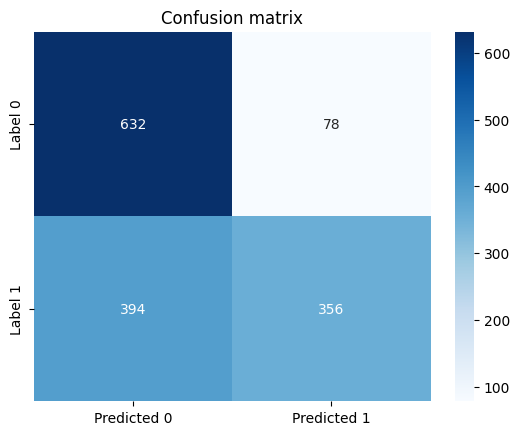

Accuracy: 67.67%


In [32]:
print(classification_report(y_test, y_pred))

micro_precision = round(precision_score(y_test, y_pred, average="micro"), 2)
micro_recall = round(recall_score(y_test, y_pred, average="micro"), 2)
micro_f1 = round(f1_score(y_test, y_pred, average="micro"), 2)
print(f"micro avg precision: {micro_precision}")
print(f"micro avg recall: {micro_precision}")
print(f"micro avg f1-score: {micro_precision}")

conf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Label 0", "Label 1"])
plt.title("Confusion matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


# percision = TP/TP + FP
# recall = TP/TP + FN
# micro for multi-label classifications. gives equal weights to every instances

#### 🌳 Decision Tree Classifier

In [33]:
decision = DecisionTreeClassifier(random_state=42)

parameters = {"max_depth": randint(20, 100), "min_samples_split": randint(5, 15), "min_samples_leaf": randint(1, 20)} # Create hyperparameters randomly
random_search = RandomizedSearchCV(estimator=decision, param_distributions=parameters, n_iter=40, cv=3, verbose=2, random_state=42, n_jobs=-1) # Set hyperparameters
random_search.fit(x_train, y_train) # Learn training data
best_trained = random_search.best_estimator_ # Find the best training data sample
y_pred = best_trained.predict(x_test) # Use y = f(x) where each y is our predicted label and x is each test sample and f is our classifier

Fitting 3 folds for each of 40 candidates, totalling 120 fits


Best hyperparameters found: {'max_depth': 54, 'min_samples_leaf': 1, 'min_samples_split': 7}
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       710
           1       0.99      0.94      0.96       750

    accuracy                           0.96      1460
   macro avg       0.96      0.96      0.96      1460
weighted avg       0.96      0.96      0.96      1460

micro avg precision: 0.96
micro avg recall: 0.96
micro avg f1-score: 0.96


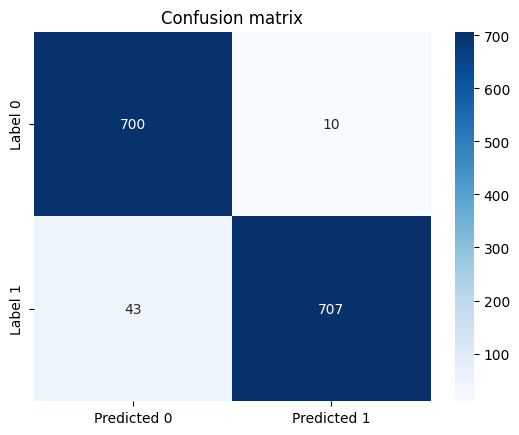

Accuracy: 96.37%


In [34]:
print("Best hyperparameters found:", random_search.best_params_)

print(classification_report(y_test, y_pred))

micro_precision = round(precision_score(y_test, y_pred, average="micro"), 2)
micro_recall = round(recall_score(y_test, y_pred, average="micro"), 2)
micro_f1 = round(f1_score(y_test, y_pred, average="micro"), 2)
print(f"micro avg precision: {micro_precision}")
print(f"micro avg recall: {micro_precision}")
print(f"micro avg f1-score: {micro_precision}")

conf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Label 0", "Label 1"])
plt.title("Confusion matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

[Text(0.5371236940982405, 0.975, 'x[0] <= 8.25\ngini = 0.5\nsamples = 5839\nvalue = [2937, 2902]'),
 Text(0.2295351447947214, 0.925, 'x[0] <= 6.95\ngini = 0.47\nsamples = 3815\nvalue = [2377, 1438]'),
 Text(0.3833294194464809, 0.95, 'True  '),
 Text(0.09298249633431085, 0.875, 'x[4] <= 4.5\ngini = 0.325\nsamples = 1179\nvalue = [938, 241]'),
 Text(0.03871884164222874, 0.825, 'x[3] <= 0.7\ngini = 0.181\nsamples = 783\nvalue = [704, 79]'),
 Text(0.03578629032258065, 0.775, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.04165139296187683, 0.775, 'x[0] <= 3.1\ngini = 0.157\nsamples = 770\nvalue = [704, 66]'),
 Text(0.029508797653958946, 0.725, 'x[1] <= 48.5\ngini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(0.02657624633431085, 0.675, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.03244134897360704, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05379398826979472, 0.725, 'x[3] <= 88.15\ngini = 0.128\nsamples = 755\nvalue = [703, 52]'),
 Text(0.03830645161290322

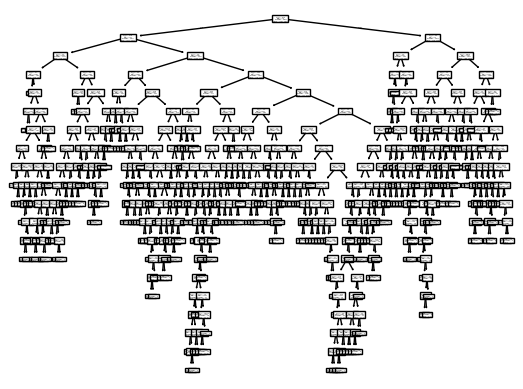

In [35]:
tree.plot_tree(best_trained)

#### 🌲🌳 Random Forest Classifier 

In [36]:
forest = RandomForestClassifier(random_state=42)

parameters = {"n_estimators": randint(100, 300), "max_depth": randint(20, 100), "min_samples_split": randint(5, 15), "min_samples_leaf": randint(1, 20)} # Create hyperparameters randomly
random_search = RandomizedSearchCV(estimator=forest, param_distributions=parameters, n_iter=40, cv=3, verbose=2, random_state=42, n_jobs=-1) # Set hyperparameters
random_search.fit(x_train, y_train) # Learn training data
best_trained = random_search.best_estimator_ # Find the best training data sample
y_pred = best_trained.predict(x_test) # Use y = f(x) where each y is our predicted label and x is each test sample and f is our classifier

Fitting 3 folds for each of 40 candidates, totalling 120 fits


Best hyperparameters found: {'max_depth': 81, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 220}
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       710
           1       0.99      0.95      0.97       750

    accuracy                           0.97      1460
   macro avg       0.97      0.97      0.97      1460
weighted avg       0.97      0.97      0.97      1460

micro avg precision: 0.97
micro avg recall: 0.97
micro avg f1-score: 0.97


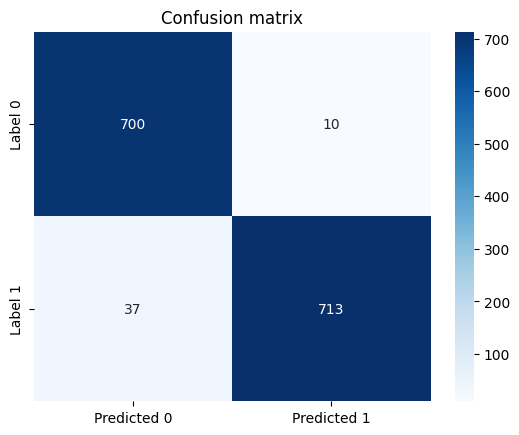

Accuracy: 96.78%


In [37]:
print("Best hyperparameters found:", random_search.best_params_)

print(classification_report(y_test, y_pred))

micro_precision = round(precision_score(y_test, y_pred, average="micro"), 2)
micro_recall = round(recall_score(y_test, y_pred, average="micro"), 2)
micro_f1 = round(f1_score(y_test, y_pred, average="micro"), 2)
print(f"micro avg precision: {micro_precision}")
print(f"micro avg recall: {micro_precision}")
print(f"micro avg f1-score: {micro_precision}")

conf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Label 0", "Label 1"])
plt.title("Confusion matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

#### ⚡️ Adaptive Boosting

micro avg precision: 0.77
micro avg recall: 0.77
micro avg f1-score: 0.77


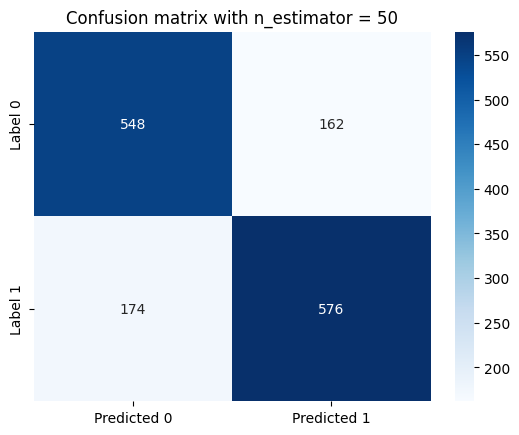

Accuracy: 76.99%
micro avg precision: 0.78
micro avg recall: 0.78
micro avg f1-score: 0.78


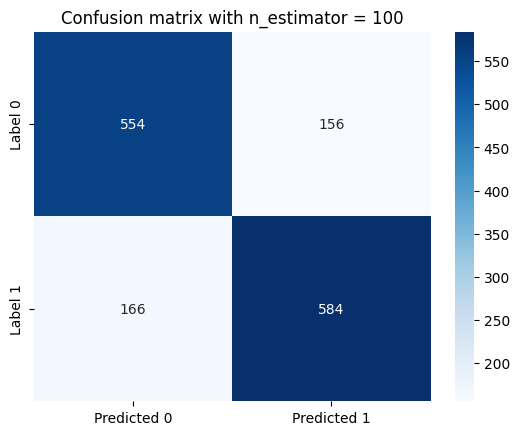

Accuracy: 77.95%
micro avg precision: 0.79
micro avg recall: 0.79
micro avg f1-score: 0.79


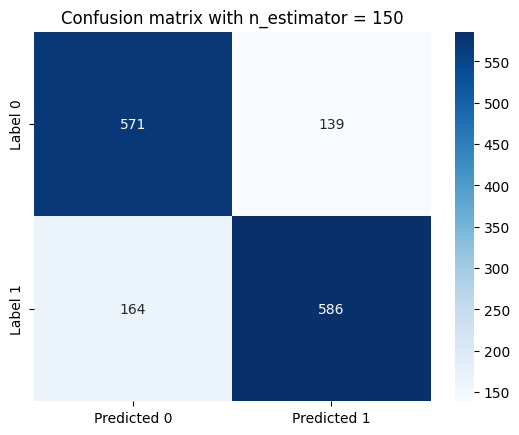

Accuracy: 79.25%
micro avg precision: 0.79
micro avg recall: 0.79
micro avg f1-score: 0.79


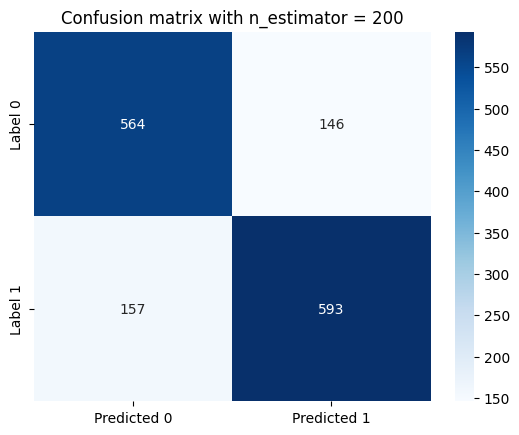

Accuracy: 79.25%
micro avg precision: 0.8
micro avg recall: 0.8
micro avg f1-score: 0.8


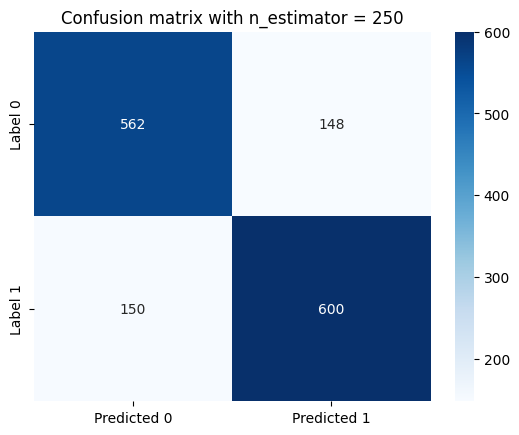

Accuracy: 79.59%
micro avg precision: 0.79
micro avg recall: 0.79
micro avg f1-score: 0.79


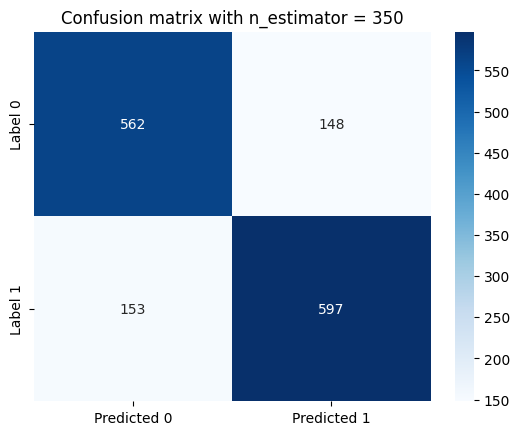

Accuracy: 79.38%


In [38]:
number_of_trains = 6
selected_n_estimators = [50, 100, 150, 200, 250, 350]
accuracies = []

for i in range(number_of_trains):
    adaptive = AdaBoostClassifier(n_estimators=selected_n_estimators[i], random_state=42)

    adaptive.fit(x_train, y_train) # Learn training data
    y_pred = adaptive.predict(x_test) # Use y = f(x) where each y is our predicted label and x is each test sample and f is our classifier

    micro_precision = round(precision_score(y_test, y_pred, average="micro"), 2)
    micro_recall = round(recall_score(y_test, y_pred, average="micro"), 2)
    micro_f1 = round(f1_score(y_test, y_pred, average="micro"), 2)
    print(f"micro avg precision: {micro_precision}")
    print(f"micro avg recall: {micro_precision}")
    print(f"micro avg f1-score: {micro_precision}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Label 0", "Label 1"])
    plt.title(f"Confusion matrix with n_estimator = {selected_n_estimators[i]}")
    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy * 100:.2f}%")

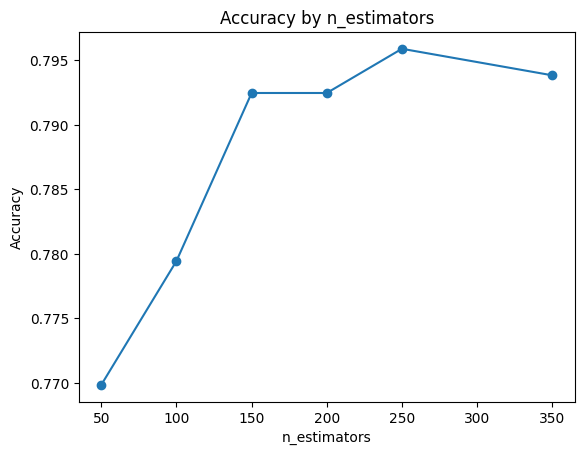

In [39]:
plt.plot(selected_n_estimators, accuracies, marker="o")
plt.title("Accuracy by n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

#### ⚡️ XGBoost

In [40]:
xg = GradientBoostingClassifier(random_state=42)

parameters = {"learning_rate": [0.3, 0.7], "n_estimators": [100, 150], "min_samples_split": [2, 5], "min_samples_leaf": [2, 5], 
              "max_depth": [5, 10], "max_features": ["sqrt", "log2"]} # Create hyperparameters gridly (deterministicly)
grid_search = GridSearchCV(estimator=xg, param_grid=parameters, cv=3, verbose=2, n_jobs=-1) # Set hyperparameters
grid_search.fit(x_train, y_train) # Learn training data
best_trained = grid_search.best_estimator_ # Find the best training data sample
y_pred = best_trained.predict(x_test) # Use y = f(x) where each y is our predicted label and x is each test sample and f is our classifier

Fitting 3 folds for each of 64 candidates, totalling 192 fits


Best hyperparameters found: {'learning_rate': 0.7, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       710
           1       0.98      0.95      0.97       750

    accuracy                           0.97      1460
   macro avg       0.97      0.97      0.97      1460
weighted avg       0.97      0.97      0.97      1460

micro avg precision: 0.97
micro avg recall: 0.97
micro avg f1-score: 0.97


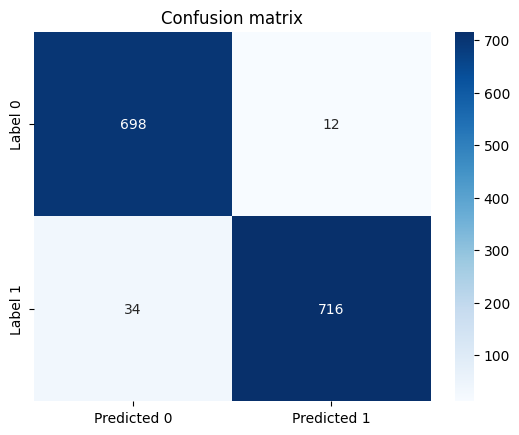

Accuracy: 96.85%


In [41]:
print("Best hyperparameters found:", grid_search.best_params_)

print(classification_report(y_test, y_pred))

micro_precision = round(precision_score(y_test, y_pred, average="micro"), 2)
micro_recall = round(recall_score(y_test, y_pred, average="micro"), 2)
micro_f1 = round(f1_score(y_test, y_pred, average="micro"), 2)
print(f"micro avg precision: {micro_precision}")
print(f"micro avg recall: {micro_precision}")
print(f"micro avg f1-score: {micro_precision}")

conf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Label 0", "Label 1"])
plt.title("Confusion matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

### 🛠 From Scratch  
In this subsection, you should implement the SAMME algorithm for adaptive boosting from scratch.Then you should deploy this boosting model and a base estimator, which is Gaussian Naive Bayes here, to classify hotels.

In [42]:
class SimpleMultiClassBoosting(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=GaussianNB, n_estimators=50):
        self.base_estimator = base_estimator if base_estimator is not None else GaussianNB()
        self.n_estimators = n_estimators
        self.learners = []
        self.learner_weights = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.weights = (1/n_samples) * np.ones(n_samples, dtype=float) # Initialize weights uniformly
        n_classes = len(np.unique(y))

        for i in range(self.n_estimators):
            learner = GaussianNB() # Instanciate model
            learner.fit(X, y, sample_weight=self.weights) # Fit to samples, using weights
            pred = learner.predict(X) # Predict the batch
            missClassified = pred != y # Get index of misclassified samples

            # Compute learner error rate according to SAMME algorithm
            learner_error_rate = np.sum(self.weights[missClassified]) / np.sum(self.weights)

            # Compute learner weight using SAMME algorithm
            learner_weight = 0.5 * np.log((1 - learner_error_rate) / (learner_error_rate + 1e-8))

            # A classifier with error rate which is worse than random should be dropped
            if(learner_error_rate >= 1 - (1 / n_classes)):
                continue

            # Increase the weights of misclassified samples according to SAMME algorithm 
            self.weights[missClassified] *= np.exp(learner_weight)
            
            self.weights /= np.sum(self.weights) # Renormalize weights to make them sum up to 1  
            self.learners.append(learner)

            # Store learner weight in self.learner_weights
            self.learner_weights.append(learner_weight)

    def predict(self, X):
        # Note that X can contain multiple samples in shape of array, in which, each row corresponds to a query
        predictionsOfLearners = []
        for learner in self.learners:
            predictionsOfLearners.append(learner.predict(X)) # Collect predictions from each learner

        # Weighted vote for each sample's prediction across all learners, each learner's weight is stored in self.learner_weights
        weighted_votes = np.zeros((X.shape[0], len(self.learners[0].classes_)))
        for i, learner in enumerate(self.learners):
            pred = learner.predict(X)
            for j, label in enumerate(learner.classes_):
                weighted_votes[:, j] += (pred == label) * self.learner_weights[i]

        # Make final prediction by considering the label which has highest weighted vote
        final_prediction = np.argmax(weighted_votes, axis=1)
        return final_prediction
        

In [43]:
boost = SimpleMultiClassBoosting(base_estimator=GaussianNB, n_estimators=50)

boost.fit(x_train, y_train) # Learn training data
y_pred = boost.predict(x_test) # Use y = f(x) where each y is our predicted label and x is each test sample and f is our classifier

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       710
           1       0.78      0.73      0.76       750

    accuracy                           0.76      1460
   macro avg       0.76      0.76      0.76      1460
weighted avg       0.76      0.76      0.76      1460

micro avg precision: 0.76
micro avg recall: 0.76
micro avg f1-score: 0.76


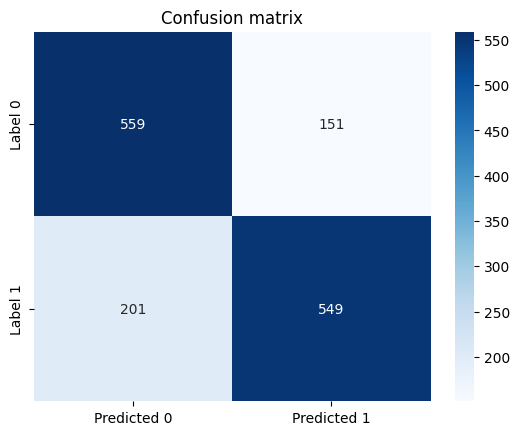

Accuracy: 75.89%


In [44]:
print(classification_report(y_test, y_pred))

micro_precision = round(precision_score(y_test, y_pred, average="micro"), 2)
micro_recall = round(recall_score(y_test, y_pred, average="micro"), 2)
micro_f1 = round(f1_score(y_test, y_pred, average="micro"), 2)
print(f"micro avg precision: {micro_precision}")
print(f"micro avg recall: {micro_precision}")
print(f"micro avg f1-score: {micro_precision}")

conf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Label 0", "Label 1"])
plt.title("Confusion matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

### 🛠 From Scratch using Library 

In [45]:
ada = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm="SAMME")

ada.fit(x_train, y_train) # Learn training data
y_pred = ada.predict(x_test) # Use y = f(x) where each y is our predicted label and x is each test sample and f is our classifier

f:\python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.76      0.77      0.77       710
           1       0.78      0.77      0.77       750

    accuracy                           0.77      1460
   macro avg       0.77      0.77      0.77      1460
weighted avg       0.77      0.77      0.77      1460

micro avg precision: 0.77
micro avg recall: 0.77
micro avg f1-score: 0.77


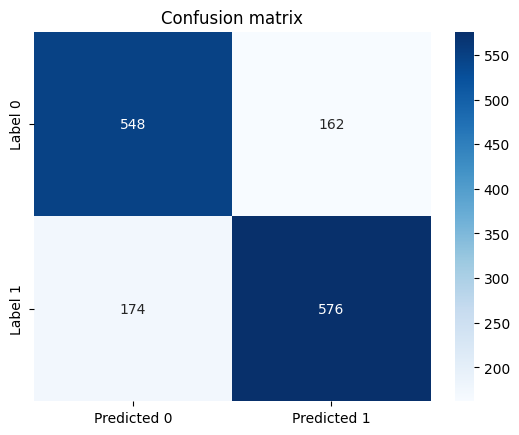

Accuracy: 76.99%


In [46]:
print(classification_report(y_test, y_pred))

micro_precision = round(precision_score(y_test, y_pred, average="micro"), 2)
micro_recall = round(recall_score(y_test, y_pred, average="micro"), 2)
micro_f1 = round(f1_score(y_test, y_pred, average="micro"), 2)
print(f"micro avg precision: {micro_precision}")
print(f"micro avg recall: {micro_precision}")
print(f"micro avg f1-score: {micro_precision}")

conf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Label 0", "Label 1"])
plt.title("Confusion matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")